# <span style="color:#0F19C9">Contenido</span>

- [Importar librerías y datos](#importar-librerías-y-datos)
- [Entendiendo los datos](#entendiendo-los-datos)
- [Análisis univariable](#análisis-univariable)
    - [Distribución de artistas](#distribución-de-artistas)
    - [Cantidad de seguidores](#cantidad-de-seguidores)
    - [Tipo de contenido](#tipo-de-contenido)
    - [Fecha y Hora de publicación](#fecha-y-hora-de-publicación)
    - [Distribución de KPI](#distribución-de-kpi)
    - [Distribución de likes](#distribución-de-likes)
    - [Distribución de comentarios](#distribución-de-comentarios)
    - [Distribución de palabras del Caption](#distribución-de-palabras-del-caption)
    - [Distribución de número de Hashtags](#distribución-de-número-de-hashtags)
    - [Distribución de hashtags](#distribución-de-hashtags)
- [Análisis multivariable](#análisis-multivariable)
- [Prueba estadística de KPI](#prueba-estadística-de-kpi)
- [Comparación popular y méxico](#comparación-popular-y-méxico)
- [Prueba estadística de referentes](#prueba-estadística-de-referentes)
- [Publicaciones virales](#publicaciones-virales)

# <span style="color:#0F19C9">Importar librerías y datos</span>

Comenzamos el ejercicio de análisis importando las librerías que usaremos para nuestro análisis, en nuestro caso serán:
- Pandas y Numpy para la manipulación de dataframes
- Matplotlib para las visualizaciones

In [534]:
# Importar librerías de manipulación de dataframes
import pandas as pd
import numpy as np
from scipy import stats

# Importar librerías de análisis
from collections import Counter
from datetime import datetime

# Importar librería de visualización
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [535]:
# Importar mi paleta de colores
juan_colors = ['#101B4B', '#545E85', '#A3A8B2',
               '#E7E7E7', '#0F19C9', '#F6D673']

# Crear la paleta de colores personalizada
colors = [juan_colors[5], juan_colors[0]]
juan_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Configurar la fuente de los gráficos
plt.rc('font', family='Georgia', size=12)

In [536]:
# Importar archivos csv
norteno = pd.read_csv('../Data/Norteno.csv')
popular = pd.read_csv('../Data/Popular.csv')
mexico = pd.read_csv('../Data/Mexico.csv')
viral = pd.read_csv('../Data/Outliers.csv')

In [537]:
# Arreglar el formato de fecha de los dataframes
norteno['Fecha y Hora'] = pd.to_datetime(norteno['Fecha y Hora'])
popular['Fecha y Hora'] = pd.to_datetime(popular['Fecha y Hora'])
mexico['Fecha y Hora'] = pd.to_datetime(mexico['Fecha y Hora'])
viral['Fecha y Hora'] = pd.to_datetime(viral['Fecha y Hora'])

C:\Users\juanp\AppData\Local\Temp\ipykernel_24196\3481923058.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  viral['Fecha y Hora'] = pd.to_datetime(viral['Fecha y Hora'])


# <span style="color:#0F19C9">Entendiendo los datos</span>

Vamos a determinar algunos valores generales de nuestro conjunto de datos para verificar si es necesaria alguna corrección que pueda facilitar el análisis.

In [538]:
# Mostrar valores generales
print(f'''Nuestro primer dataframe llamado Norteño, tiene {norteno.shape[0]} filas y {norteno.shape[1]} columnas,
      tiene {norteno.isna().sum().sum()} registros nulos y {norteno.duplicated().sum()} registros duplicados.
      Nuestro segundo dataframe llamado Popular, tiene {popular.shape[0]} filas y {popular.shape[1]} columnas,
      tiene {popular.isna().sum().sum()} registros nulos y {popular.duplicated().sum()} registros duplicados.
      Nuestro tercer dataframe llamado México, tiene {mexico.shape[0]} filas y {mexico.shape[1]} columnas,
      tiene {mexico.isna().sum().sum()} registros nulos y {mexico.duplicated().sum()} registros duplicados.
      Nuestro cuarto dataframe llamado Viral, tiene {viral.shape[0]} filas y {viral.shape[1]} columnas,
      tiene {viral.isna().sum().sum()} registros nulos y {viral.duplicated().sum()} registros duplicados.
      ''')

Nuestro primer dataframe llamado Norteño, tiene 72 filas y 11 columnas,
      tiene 0 registros nulos y 0 registros duplicados.
      Nuestro segundo dataframe llamado Popular, tiene 69 filas y 11 columnas,
      tiene 0 registros nulos y 0 registros duplicados.
      Nuestro tercer dataframe llamado México, tiene 73 filas y 11 columnas,
      tiene 1 registros nulos y 0 registros duplicados.
      Nuestro cuarto dataframe llamado Viral, tiene 26 filas y 11 columnas,
      tiene 0 registros nulos y 0 registros duplicados.
      


In [539]:
# Encontrar el valor nulo del dataframe México
mexico[mexico['Caption'].isna()]

,Artista,Seguidores,Tipo,Fecha y Hora,KPI,Likes,Comentarios,Caption,Palabras en Caption,Número de hashtags,Hashtags
68,Bobby Pulido,162000,Reel,2024-07-27 19:33:21-06:00,0.01392,2255,76,NaN,0,0,[]


In [540]:
# Eliminar la publicación sin caption
mexico = mexico[~mexico['Caption'].isna()]

In [541]:
# Imprimir las columnas
print(f'Las columnas de los dataframes son {list(norteno.columns)}')

Las columnas de los dataframes son ['Artista', 'Seguidores', 'Tipo', 'Fecha y Hora', 'KPI', 'Likes', 'Comentarios', 'Caption', 'Palabras en Caption', 'Número de hashtags', 'Hashtags']


Todos los conjuntos de datos comparten las mismas 11 columnas. Nuestro dataframe principal, llamado Norteño, tiene 71 registros, y será el insumo principal para nuestro análisis. Lo soportaremos sobre dos dataframes adicionales llamados Popular y México, cada uno con 70 publicaciones de Instagram y sus respectivas 11 columnas.

# <span style="color:#0F19C9">Análisis Univariable</span>

Vamos a comenzar analizando cada una de las columnas de nuestro dataframe principal: Norteño

In [542]:
# Mostrar 3 registros aleatorios del dataframe
norteno.sample(3)

,Artista,Seguidores,Tipo,Fecha y Hora,KPI,Likes,Comentarios,Caption,Palabras en Caption,Número de hashtags,Hashtags
49,Grupo Dominio,70100,Carrusel,2024-05-29 01:46:07-05:00,0.005278,370,5,Un gran Show en Socorro/Stander 🤠❤️‍🔥\nGRACIAS...,17,7,"['#socorro', '#dominio', '#show', '#tendencia'..."
30,Uriel Henao,50400,Reel,2024-07-14 14:52:19-05:00,0.004940,249,5,"Mis amigos buenas tardes, ya vamos saliendo de...",63,3,"['#urielhenao', '#elreydeloscorridosprohibidos..."
52,Los 5 del Norte,16000,Reel,2024-09-15 10:29:27-05:00,0.006188,99,0,ESTE SABADO 30 DE NOVIEMBRE SE VIENE EL FESTIV...,46,1,['#bosatama']


## <span style="color:#0F19C9">Distribución de artistas</span>

C:\Users\juanp\AppData\Local\Temp\ipykernel_24196\239348815.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(rows_by_artist.index,


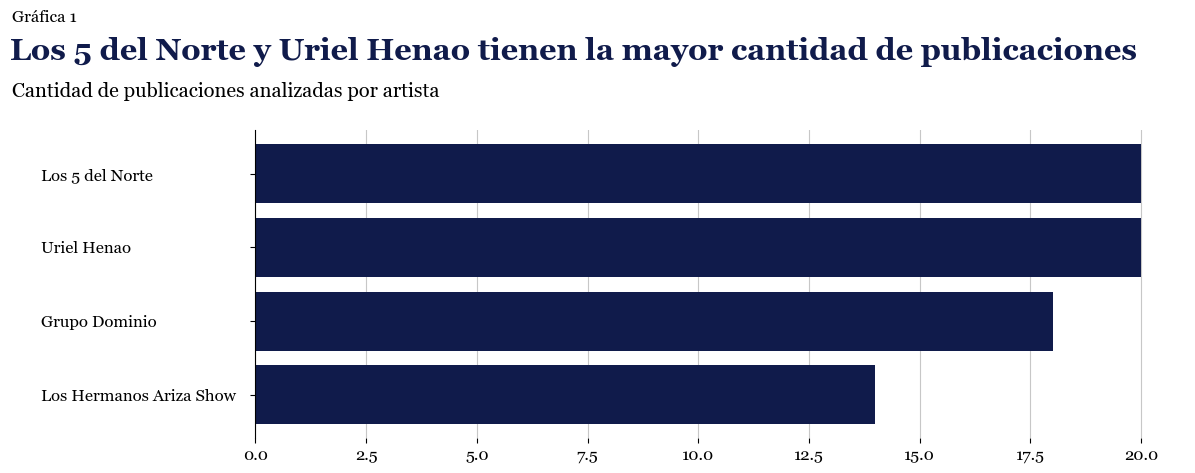

In [543]:
# Encontrar la cantidad de registros por artista
rows_by_artist = norteno['Artista'].value_counts() \
    .sort_values()

# Graficar la cantidad de registros por artista
fig, ax = plt.subplots(figsize=[12, 4])
plt.text(x=-5.5, y=5.06,
         s='Gráfica 1')
plt.title('Los 5 del Norte y Uriel Henao tienen la mayor cantidad de publicaciones',
          weight='bold', size=22,
          x=0.342, y=1.2, color=juan_colors[0])
plt.suptitle('Cantidad de publicaciones analizadas por artista',
             x=0.10, y=1)
plt.barh(y=rows_by_artist.index,
         width=rows_by_artist,
         color=juan_colors[0],
         zorder=2)
ax.set_yticklabels(rows_by_artist.index,
                   ha='left',
                   x=-.22)
plt.grid(axis='x', alpha=0.7,
         zorder=1)
ax.spines[['top', 'bottom', 'right']].set_visible(False)
plt.show()

Aquí es importante mencionar que la información descargada directamente de Instagram contenía 20 publicaciones por artista, pero que se han eliminado algunas que, basado en el KPI de performance, representaban valores atípicos ya que la cantidad de likes, con respecto a la cantidad de seguidores, es demasiado alta. Estos registros los analizaremos a profundidad más adelante.

## <span style="color:#0F19C9">Cantidad de seguidores</span>

C:\Users\juanp\AppData\Local\Temp\ipykernel_24196\829120087.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(followers.index,


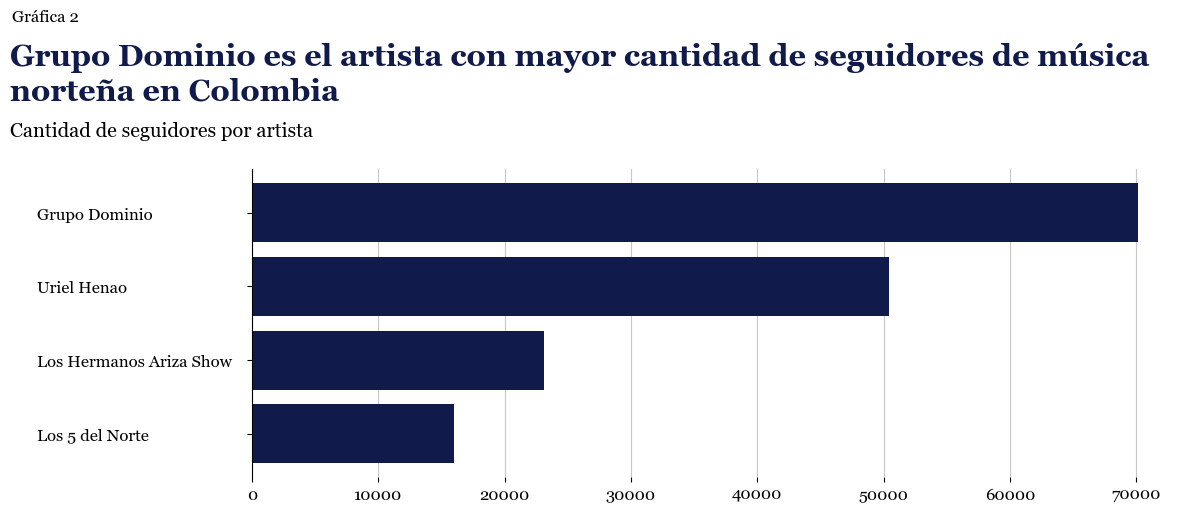

In [544]:
# Crear listado de seguidores por artista
followers = norteno.groupby('Artista')['Seguidores'].max().sort_values()

# Graficar la cantidad de seguidores por artista


fig, ax = plt.subplots(figsize=[12, 4])


plt.text(x=-19000, y=5.6,


         s='Gráfica 2')


plt.title('Grupo Dominio es el artista con mayor cantidad de seguidores de música \nnorteña en Colombia',
          weight='bold', size=22, ha='left',
          x=-0.26, y=1.2, color=juan_colors[0])


plt.suptitle('Cantidad de seguidores por artista',
             x=0.05, y=1)


plt.barh(y=followers.index,


         width=followers,
         color=juan_colors[0],
         zorder=2)
ax.set_yticklabels(followers.index,
                   ha='left',
                   x=-.22)
plt.grid(axis='x', alpha=0.7,
         zorder=1)
ax.spines[['top', 'bottom', 'right']].set_visible(False)


plt.show()

## <span style="color:#0F19C9">Tipo de contenido</span>

In [545]:
# Contar tipo de contenido por artista
type_of_content = norteno.pivot_table(index='Artista',
                                      columns='Tipo',
                                      values='Fecha y Hora',
                                      aggfunc='count',
                                      fill_value=0)

# Normalizar los datos para que sumen 100 por cada artista
type_of_content = type_of_content.div(
    type_of_content.sum(axis=1), axis=0) * 100

type_of_content

Tipo,Carrusel,Foto,Reel
Artista,,,
Grupo Dominio,55.555556,0.0,44.444444
Los 5 del Norte,0.000000,15.0,85.000000
Los Hermanos Ariza Show,7.142857,0.0,92.857143
Uriel Henao,5.000000,15.0,80.000000


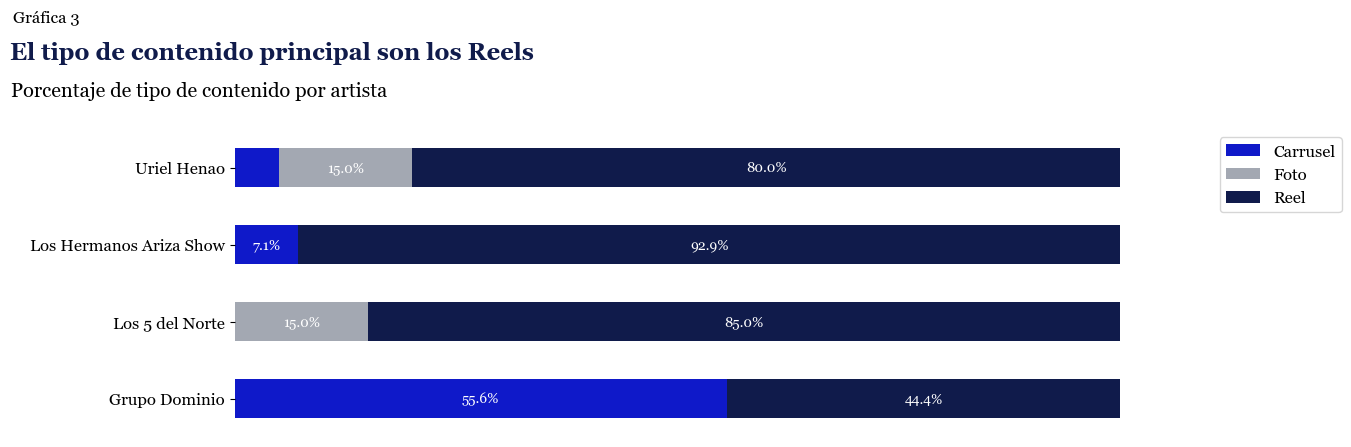

In [546]:
# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 4))
plt.text(x=-25, y=4.9,
         s='Gráfica 3')
plt.title('El tipo de contenido principal son los Reels',
          weight='bold', size=17,
          x=0.04, y=1.20, color=juan_colors[0])
plt.suptitle('Porcentaje de tipo de contenido por artista',
             x=0.095, y=1)
type_of_content.plot(kind='barh', stacked=True,
                     ax=ax, color=[juan_colors[4],
                                   juan_colors[2],
                                   juan_colors[0]])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_ylabel('')
ax.set_xticks([])

for i in range(type_of_content.shape[0]):
    cumulative_sum = 0
    for j, tipo in enumerate(type_of_content.columns):
        value = type_of_content.iloc[i, j]
        if value > 5:
            ax.text(x=cumulative_sum + value / 2, y=i,
                    s=f'{value:.1f}%', ha='center', va='center',
                    color='white', fontsize=10)
        cumulative_sum += value

plt.grid(axis='x', alpha=0.7,
         zorder=1)
ax.spines[['top', 'bottom', 'right', 'left']].set_visible(False)
# Ajustar el layout
# plt.tight_layout()
plt.show()

## <span style="color:#0F19C9">Fecha y Hora de publicación</span>

In [547]:
# Imprimir el rango de fechas
print(
    f"Las publicaciones son desde {norteno['Fecha y Hora'].min()} hasta el {norteno['Fecha y Hora'].max()}")

Las publicaciones son desde 2024-05-17 11:18:47-05:00 hasta el 2024-09-17 16:16:39-05:00


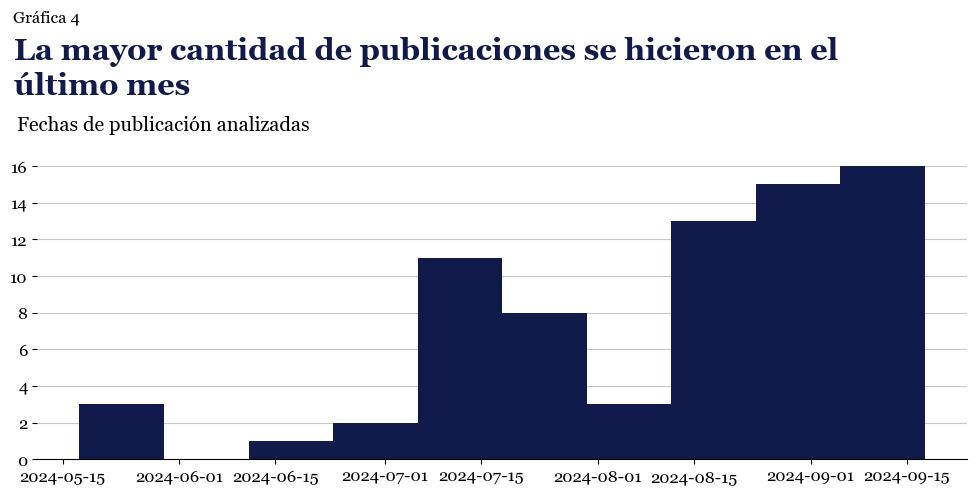

In [548]:
# Graficar la distribución de fechas
fig, ax = plt.subplots(figsize=[12, 4])
plt.text(x=datetime(2024, 5, 8), y=23.9,
         s='Gráfica 4')
plt.title('La mayor cantidad de publicaciones se hicieron en el \núltimo mes',
          weight='bold', size=22, ha='left',
          x=-0.025, y=1.16, color=juan_colors[0])
plt.suptitle('Fechas de publicación analizadas',
             x=0.23, y=0.97)
plt.hist(norteno['Fecha y Hora'],
         color=juan_colors[0],
         zorder=2)
plt.grid(axis='y', alpha=0.7,
         zorder=1)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

## <span style="color:#0F19C9">Distribución de KPI</span>

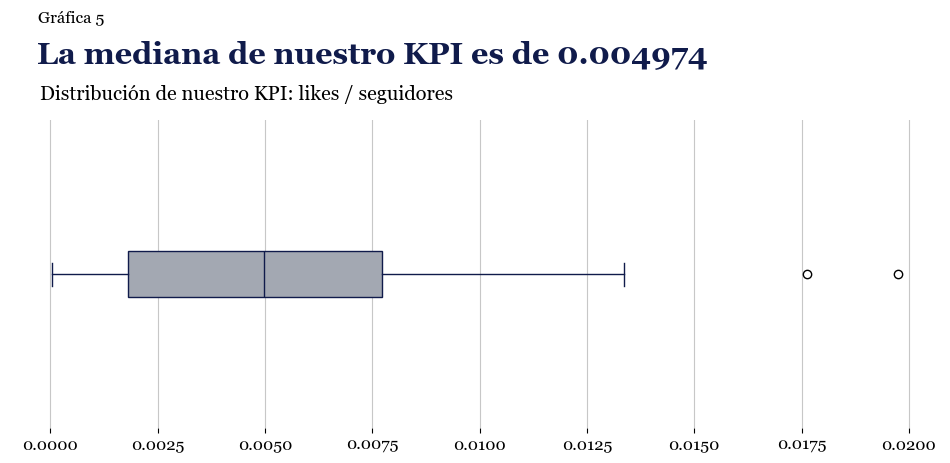

count    72.000000
mean      0.005361
std       0.004173
min       0.000043
25%       0.001813
50%       0.004974
75%       0.007724
max       0.019740
Name: KPI, dtype: float64

In [549]:
# Graficar la distribución de fechas
fig, ax = plt.subplots(figsize=[12, 4])
plt.text(x=-0.0003, y=1.82,
         s='Gráfica 5')
plt.title('La mediana de nuestro KPI es de 0.004974',
          weight='bold', size=22,
          x=0.39, y=1.16, color=juan_colors[0])
plt.suptitle('Distribución de nuestro KPI: likes / seguidores',
             ha='left', x=0.15, y=0.97)
plt.boxplot(norteno['KPI'], vert=False,
            patch_artist=True,
            boxprops=dict(facecolor=juan_colors[2], color=juan_colors[0]),
            whiskerprops=dict(color=juan_colors[0]),
            capprops=dict(color=juan_colors[0]),
            medianprops=dict(color=juan_colors[0]),
            flierprops=dict(color=juan_colors[0]),
            zorder=2)
plt.grid(axis='x', alpha=0.7,
         zorder=1)
ax.set_yticks([])
ax.spines[['top', 'bottom', 'right', 'left']].set_visible(False)
plt.show()

norteno['KPI'].describe()

In [550]:
# Encontrar mediana de likes por cuenta
mediana_de_likes = {}
mediana_de_likes['Los Hermanos Ariza Show'] = 23100 * norteno['KPI'].median()
mediana_de_likes['Uriel Henao'] = 50400 * norteno['KPI'].median()
mediana_de_likes['Grupo Dominio'] = 70100 * norteno['KPI'].median()
mediana_de_likes['Los 5 del Norte'] = 16000 * norteno['KPI'].median()

mediana_de_likes

{'Los Hermanos Ariza Show': 114.89488231098224,
 'Uriel Henao': 250.67974322396125,
 'Grupo Dominio': 348.6636904761842,
 'Los 5 del Norte': 79.5808708647496}

## <span style="color:#0F19C9">Distribución de Likes</span>

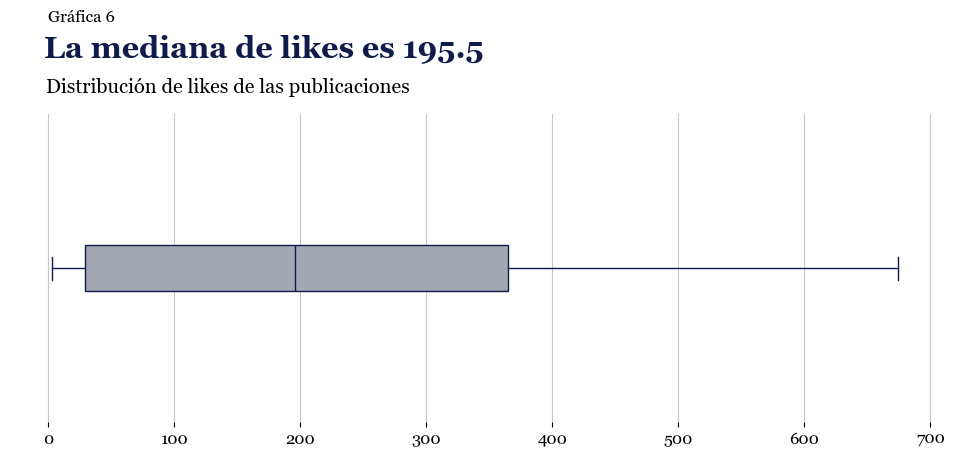

count     72.000000
mean     221.319444
std      191.892710
min        3.000000
25%       29.000000
50%      195.500000
75%      364.750000
max      674.000000
Name: Likes, dtype: float64

In [551]:
# Graficar la distribución de fechas
fig, ax = plt.subplots(figsize=[12, 4])
plt.text(x=-0.0003, y=1.8,
         ha='left',
         s='Gráfica 6')
plt.title('La mediana de likes es 195.5',
          weight='bold', size=22,
          x=0.037, y=1.16, color=juan_colors[0],
          loc='left')
plt.suptitle('Distribución de likes de las publicaciones',
             ha='left', x=0.155, y=0.97)
plt.boxplot(norteno['Likes'], vert=False,
            patch_artist=True,
            boxprops=dict(facecolor=juan_colors[2], color=juan_colors[0]),
            whiskerprops=dict(color=juan_colors[0]),
            capprops=dict(color=juan_colors[0]),
            medianprops=dict(color=juan_colors[0]),
            flierprops=dict(color=juan_colors[0]),
            zorder=2)
plt.grid(axis='x', alpha=0.7,
         zorder=1)
ax.set_yticks([])
ax.spines[['top', 'bottom', 'right', 'left']].set_visible(False)
plt.show()

norteno['Likes'].describe()

## <span style="color:#0F19C9">Distribución de Comentarios</span>

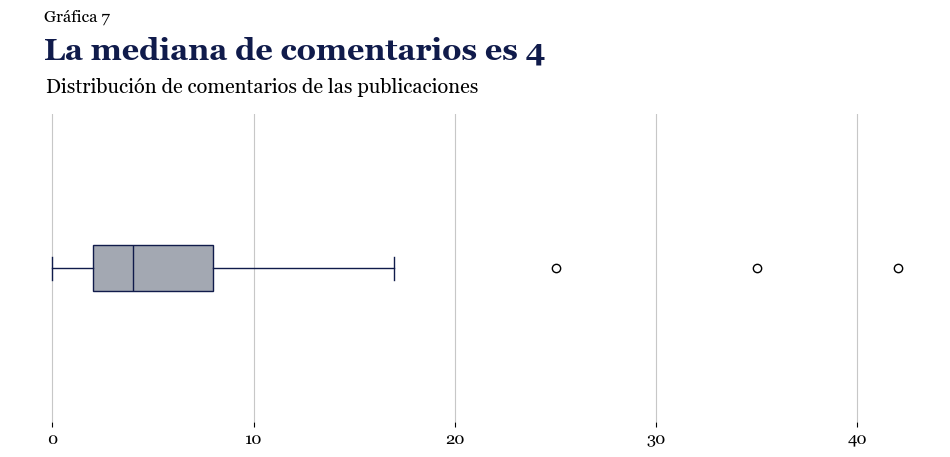

count    72.000000
mean      6.138889
std       7.223408
min       0.000000
25%       2.000000
50%       4.000000
75%       8.000000
max      42.000000
Name: Comentarios, dtype: float64

In [552]:
# Graficar la distribución de fechas
fig, ax = plt.subplots(figsize=[12, 4])
plt.text(x=-0.4, y=1.8,
         ha='left',
         s='Gráfica 7')
plt.title('La mediana de comentarios es 4',
          weight='bold', size=22,
          x=0.037, y=1.15, color=juan_colors[0],
          loc='left')
plt.suptitle('Distribución de comentarios de las publicaciones',
             ha='left', x=0.155, y=0.97)
plt.boxplot(norteno['Comentarios'], vert=False,
            patch_artist=True,
            boxprops=dict(facecolor=juan_colors[2], color=juan_colors[0]),
            whiskerprops=dict(color=juan_colors[0]),
            capprops=dict(color=juan_colors[0]),
            medianprops=dict(color=juan_colors[0]),
            flierprops=dict(color=juan_colors[0]),
            zorder=2)
plt.grid(axis='x', alpha=0.7,
         zorder=1)
ax.set_yticks([])
ax.spines[['top', 'bottom', 'right', 'left']].set_visible(False)
plt.show()

norteno['Comentarios'].describe()

## <span style="color:#0F19C9">Distribución de Palabras del Caption</span>

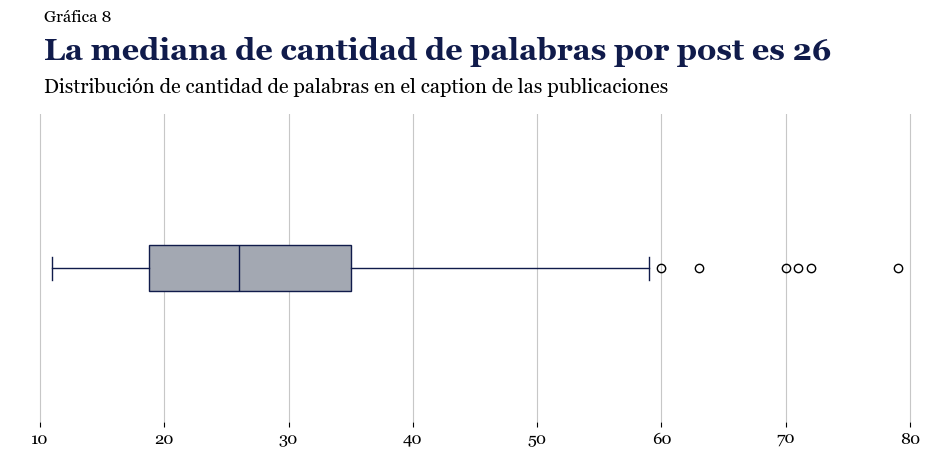

count    72.000000
mean     30.277778
std      16.341619
min      11.000000
25%      18.750000
50%      26.000000
75%      35.000000
max      79.000000
Name: Palabras en Caption, dtype: float64

In [553]:
# Graficar la distribución de fechas
fig, ax = plt.subplots(figsize=[12, 4])
plt.text(x=10.3, y=1.8,
         ha='left',
         s='Gráfica 8')
plt.title('La mediana de cantidad de palabras por post es 26',
          weight='bold', size=22,
          x=0.037, y=1.15, color=juan_colors[0],
          loc='left')
plt.suptitle('Distribución de cantidad de palabras en el caption de las publicaciones',
             ha='left', x=0.153, y=0.97)
plt.boxplot(norteno['Palabras en Caption'], vert=False,
            patch_artist=True,
            boxprops=dict(facecolor=juan_colors[2], color=juan_colors[0]),
            whiskerprops=dict(color=juan_colors[0]),
            capprops=dict(color=juan_colors[0]),
            medianprops=dict(color=juan_colors[0]),
            flierprops=dict(color=juan_colors[0]),
            zorder=2)
plt.grid(axis='x', alpha=0.7,
         zorder=1)
ax.set_yticks([])
ax.spines[['top', 'bottom', 'right', 'left']].set_visible(False)
plt.show()

norteno['Palabras en Caption'].describe()

## <span style="color:#0F19C9">Distribución de Número de Hashtags</span>

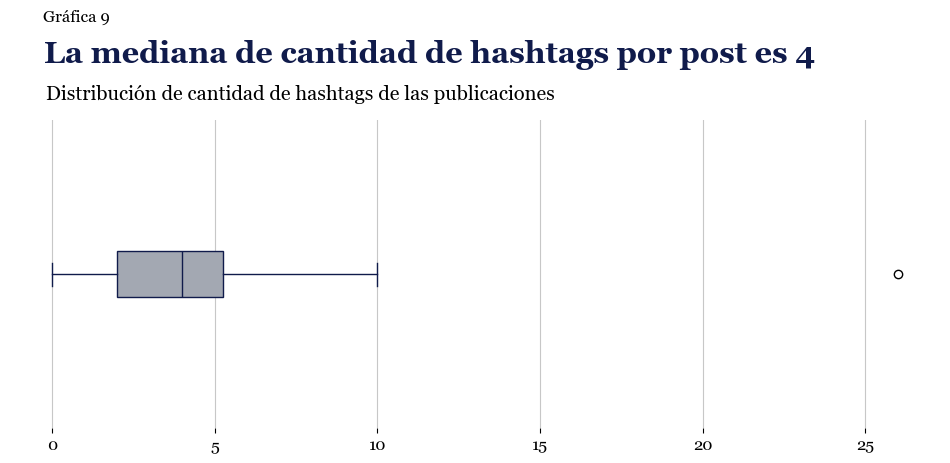

count    72.000000
mean      4.055556
std       3.672850
min       0.000000
25%       2.000000
50%       4.000000
75%       5.250000
max      26.000000
Name: Número de hashtags, dtype: float64

In [554]:
# Graficar la distribución de fechas
fig, ax = plt.subplots(figsize=[12, 4])
plt.text(x=-0.3, y=1.82,
         ha='left',
         s='Gráfica 9')
plt.title('La mediana de cantidad de hashtags por post es 4',
          weight='bold', size=22,
          x=0.037, y=1.16, color=juan_colors[0],
          loc='left')
plt.suptitle('Distribución de cantidad de hashtags de las publicaciones',
             ha='left', x=0.155, y=0.97)
plt.boxplot(norteno['Número de hashtags'], vert=False,
            patch_artist=True,
            boxprops=dict(facecolor=juan_colors[2], color=juan_colors[0]),
            whiskerprops=dict(color=juan_colors[0]),
            capprops=dict(color=juan_colors[0]),
            medianprops=dict(color=juan_colors[0]),
            flierprops=dict(color=juan_colors[0]),
            zorder=2)
plt.grid(axis='x', alpha=0.7,
         zorder=1)
ax.set_yticks([])
ax.spines[['top', 'bottom', 'right', 'left']].set_visible(False)
plt.show()

norteno['Número de hashtags'].describe()

## <span style="color:#0F19C9">Distribución de Hashtags</span>

In [555]:
# Limpiar los strings y convertirlos a listas
norteno['Hashtags'] = norteno['Hashtags'].apply(
    lambda x: x.strip("[]").replace("'", "").split(", "))
hashtags_list = [hashtag for sublist in norteno['Hashtags']
                 for hashtag in sublist]
hashtags_list = [hashtag for hashtag in hashtags_list if hashtag]

# Contar la frecuencia de cada hashtag
hashtag_counts = Counter(hashtags_list)
top_hashtags = hashtag_counts.most_common(10)
hashtags, counts = zip(*top_hashtags)

C:\Users\juanp\AppData\Local\Temp\ipykernel_24196\3400162727.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(hashtags, ha='left',


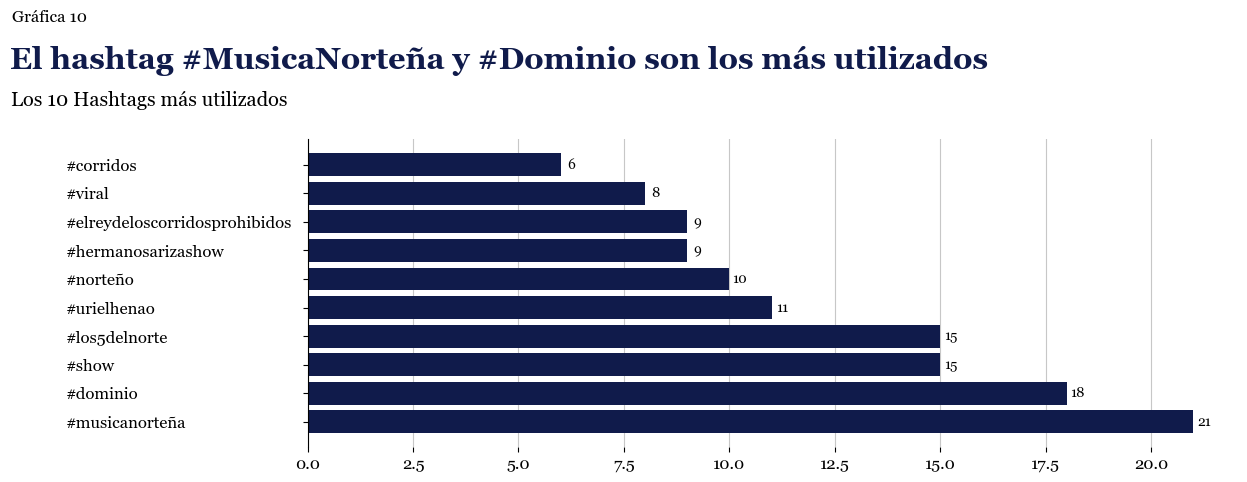

In [556]:
# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 4))
plt.text(x=-7, y=14,
         ha='left',
         s='Gráfica 10')
plt.title('El hashtag #MusicaNorteña y #Dominio son los más utilizados',
          weight='bold', size=22,
          x=-0.32, y=1.2, color=juan_colors[0],
          loc='left')
plt.suptitle('Los 10 Hashtags más utilizados',
             ha='left', x=-0.122, y=1)
bars = ax.barh(hashtags, counts,
               color=juan_colors[0],
               zorder=2)
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.25,
            bar.get_y() + bar.get_height() / 2,
            f'{int(width)}',
            va='center',
            ha='center',
            fontsize=10)
ax.set_yticklabels(hashtags, ha='left',
                   x=-0.25)
plt.grid(axis='x', alpha=0.7,
         zorder=1)
ax.spines[['top', 'bottom', 'right']].set_visible(False)
# plt.tight_layout()
plt.show()

Aunque Grupo Dominio no es el artista con la mayor cantidad de publicaciones, si es el artista con mayor cantidad de seguidores, seguido de Uriel Henao. Es claro que su estrategia de contenido en los últimos post ha estado muy enfocada en carruseles, seguido de videos, no se encontró un solo post de foto. En el caso de Uriel Henao, aunque encontramos los tres tipos de contenido, su estrategia está enfocada en videos.

Afortunadamente también encontramos cuentas muy activas en la actualidad, donde la mayoría de las publicaciones que analizaremos se hicieron en el último mes. Ahora, respecto a nuestro KPI del número de likes dividido en el número de seguidores, encontramos una mediana de 0.004565. Esto quiere decir que una publicación de Los Hermanos Ariza Show tiene una mediana de 105.44 likes, de Uriel Henao tiene 230.07 likes, Grupo Dominio tiene 319.99 likes y Los 5 del Norte tiene 73.03 likes; esto para poder mantenerse en la mediana del género. Aunque en general, la mediana de likes por post se encuentra en 194, con 4 comentarios, lo que nos lleva a concluir que no es un público que comenta las publicaciones, no es una métrica valiosa para el análisis.

En términos del Caption, encontramos un intervalo intercuartílico de 19 a 35 palabras con un promedio de 30.50 palabras, incluyendo los hashtags, es decir, captions largos. Y en términos de hashtags, un intervalo de entre 2 y 5.5 hashtags con un promedio de 4.11 hashtags por post de los cuales #MusicaNorteña y #Dominio son los más utilizados con 21 y 18 veces respectivamente.

# <span style="color:#0F19C9">Análisis Multivariable</span>

Ahora, en esta parte del análisis nos concentraremos en encontrar posibles relaciones entre las columnas.

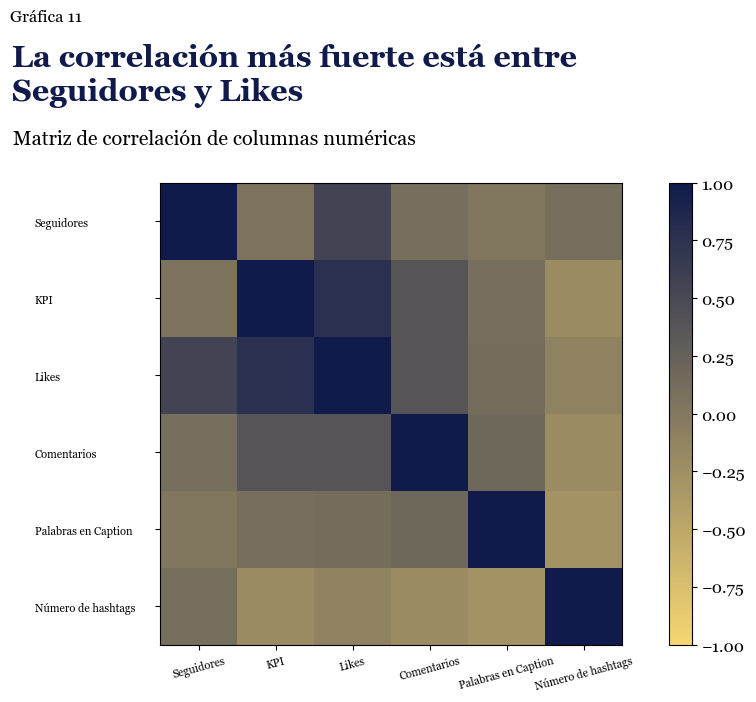

,Seguidores,KPI,Likes,Comentarios,Palabras en Caption,Número de hashtags
Seguidores,1.000000,0.048890,0.548307,0.095080,0.008336,0.103386
KPI,0.048890,1.000000,0.766222,0.381782,0.099832,-0.197007
Likes,0.548307,0.766222,1.000000,0.379830,0.116709,-0.108518
Comentarios,0.095080,0.381782,0.379830,1.000000,0.173634,-0.210523
Palabras en Caption,0.008336,0.099832,0.116709,0.173634,1.000000,-0.281621
Número de hashtags,0.103386,-0.197007,-0.108518,-0.210523,-0.281621,1.000000


In [557]:
# Hacer primero una matriz de correlación
correlation_matrix = norteno.corr(numeric_only=True)

# Graficar la matriz de correlación
fig, ax = plt.subplots(figsize=(12, 6))
plt.text(x=-2.45, y=-2.6,
         s='Gráfica 11')
plt.title('La correlación más fuerte está entre \nSeguidores y Likes',
          weight='bold', size=22, ha='left',
          x=-0.32, y=1.16, color=juan_colors[0])
plt.suptitle('Matriz de correlación de columnas numéricas',
             x=0.405, y=0.97)
cax = ax.imshow(correlation_matrix, cmap=juan_cmap,
                vmin=-1, vmax=1)
cbar = fig.colorbar(cax, ax=ax)
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=15,
                   fontsize=8)
ax.set_yticklabels(correlation_matrix.columns,
                   fontsize=8, ha='left', x=-0.25)
plt.show()

correlation_matrix

A partir de esa matriz de correlación podemos establecer una relación débil pero negativa del -0.28 entre la cantidad de palabras del caption y el número de hashtags, que no resulta ser tan interesante para nuestro análisis. Luego, encontramos una correlación positiva, pero igual debil del 0.37 entre el número de likes y el número de comentarios, que no es sorpresa, debido a lo que ya habíamos estudiado que las personas no tienen a dejar comentarios en las publicaciones, entonces podríamos continuar de forma efectiva basándonos en los likes. Y finalmente, la correlación más fuerte, es positiva, pero es media de 0.54 entre el número de seguidores y el número de likes, lo que nos garantiza también, que nuestro KPI es el correcto para nuestras evaluaciones.

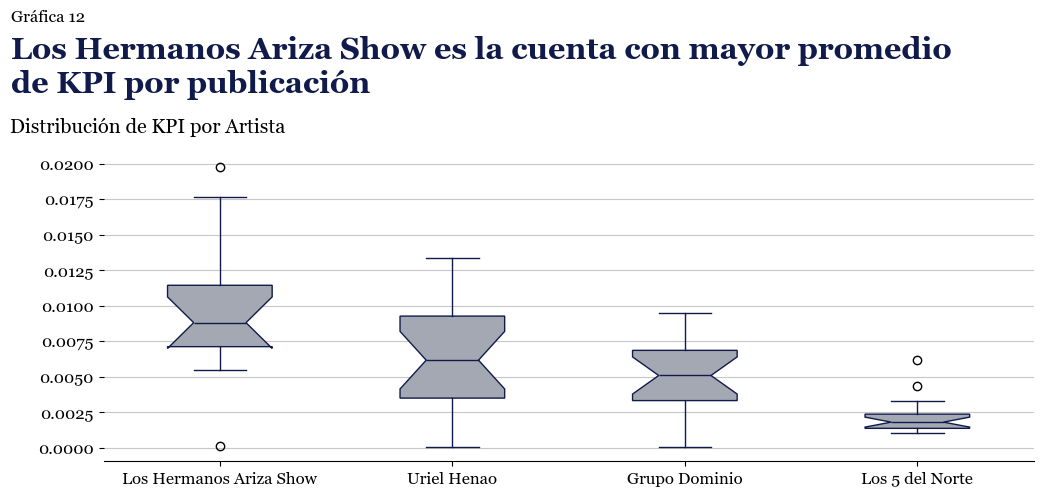

In [558]:
# Agrupar los 'Likes' por 'Artista'
artistas = norteno['Artista'].unique()
likes_por_artista = [norteno[norteno['Artista']
                             == artista]['KPI'] for artista in artistas]

# Configurar la figura y graficar los boxplots
fig, ax = plt.subplots(figsize=[12, 4])
plt.text(x=0.1, y=0.03, s='Gráfica 12')
plt.title('Los Hermanos Ariza Show es la cuenta con mayor promedio \nde KPI por publicación',
          weight='bold', size=22,
          x=-0.1, y=1.17, color=juan_colors[0],
          loc='left')
plt.suptitle(
    'Distribución de KPI por Artista',
    ha='left', x=0.047, y=0.97)
plt.boxplot(likes_por_artista, labels=artistas,
            notch=True, patch_artist=True,
            boxprops=dict(facecolor=juan_colors[2], color=juan_colors[0]),
            whiskerprops=dict(color=juan_colors[0]),
            capprops=dict(color=juan_colors[0]),
            medianprops=dict(color=juan_colors[0]),
            flierprops=dict(color=juan_colors[0]),
            zorder=2)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.7,
         zorder=1)
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

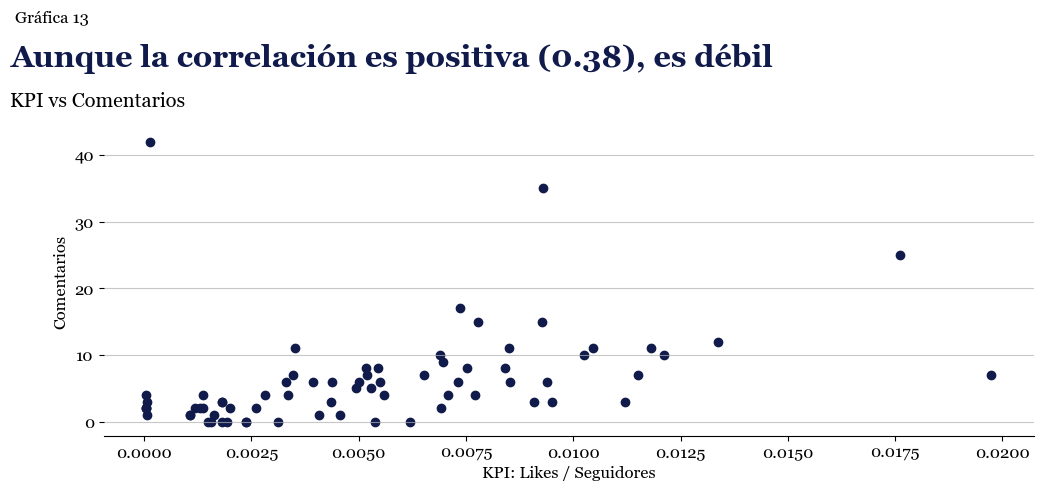

In [559]:
# Configurar la figura y graficar los boxplots
fig, ax = plt.subplots(figsize=[12, 4])
plt.text(x=-0.003, y=60, s='Gráfica 13')
plt.title('Aunque la correlación es positiva (0.38), es débil',
          weight='bold', size=22,
          x=-0.1, y=1.17, color=juan_colors[0],
          loc='left')
plt.suptitle('KPI vs Comentarios',
             ha='left', x=0.047, y=0.97)
plt.scatter(x=norteno['KPI'],
            y=norteno['Comentarios'],
            color=juan_colors[0])
plt.xlabel('KPI: Likes / Seguidores')
plt.ylabel('Comentarios')
plt.grid(axis='y', alpha=0.7,
         zorder=1)
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

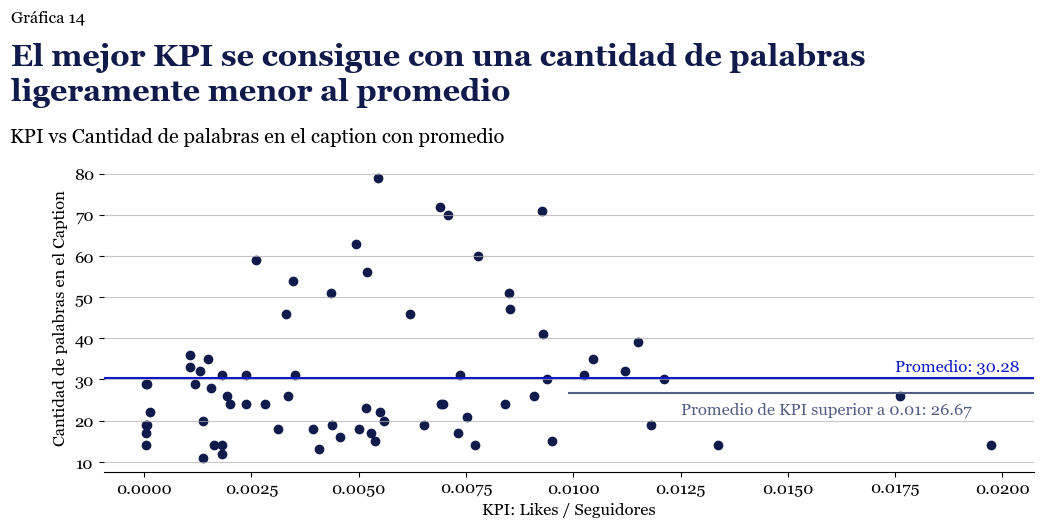

In [560]:
# Mejores KPIS
best_kpi = norteno[norteno['KPI'] >= 0.0100]['Palabras en Caption'].mean()

# Configurar la figura y graficar los boxplots
fig, ax = plt.subplots(figsize=[12, 4])
plt.text(x=-0.0031, y=117, s='Gráfica 14')
plt.title('El mejor KPI se consigue con una cantidad de palabras \nligeramente menor al promedio',
          weight='bold', size=22,
          x=-0.1, y=1.18, color=juan_colors[0],
          loc='left')
plt.suptitle(
    'KPI vs Cantidad de palabras en el caption con promedio',
    ha='left', x=0.047, y=0.97)
plt.scatter(x=norteno['KPI'],
            y=norteno['Palabras en Caption'],
            color=juan_colors[0])
plt.axhline(y=norteno['Palabras en Caption'].mean(),
            color=juan_colors[4])
plt.text(x=0.0175,
         y=norteno['Palabras en Caption'].mean() + 2,
         s=f"Promedio: {norteno['Palabras en Caption'].mean():.2f}",
         color=juan_colors[4])
plt.axhline(y=best_kpi,
            color=juan_colors[1],
            xmin=0.5,
            xmax=1)
plt.text(x=0.0125,
         y=best_kpi - 5,
         s=f"Promedio de KPI superior a 0.01: {best_kpi:.2f}",
         color=juan_colors[1])
plt.ylabel('Cantidad de palabras en el Caption')
plt.xlabel('KPI: Likes / Seguidores')
plt.grid(axis='y', alpha=0.7,
         zorder=1)
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

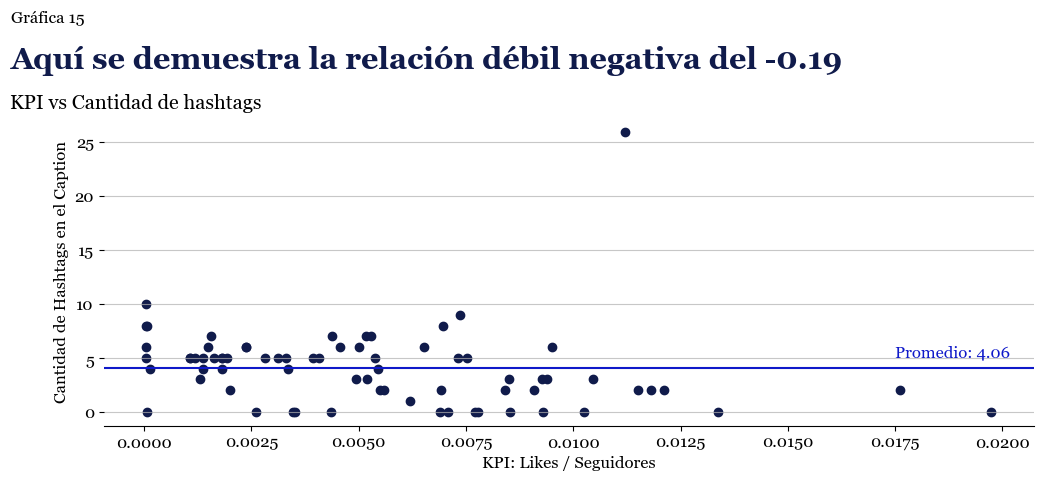

In [561]:
# Mejores KPIS
best_kpi = norteno[norteno['KPI'] >= 0.0100]['Número de hashtags'].mean()

# Configurar la figura y graficar los boxplots
fig, ax = plt.subplots(figsize=[12, 4])
plt.text(x=-0.0031, y=36.2, s='Gráfica 15')
plt.title('Aquí se demuestra la relación débil negativa del -0.19',
          weight='bold', size=22,
          x=-0.1, y=1.13, color=juan_colors[0],
          loc='left')
plt.suptitle('KPI vs Cantidad de hashtags',
             ha='left', x=0.047, y=0.94)
plt.scatter(x=norteno['KPI'],
            y=norteno['Número de hashtags'],
            color=juan_colors[0])
plt.axhline(y=norteno['Número de hashtags'].mean(),
            color=juan_colors[4])
plt.text(x=0.0175,
         y=norteno['Número de hashtags'].mean() + 1,
         s=f"Promedio: {norteno['Número de hashtags'].mean():.2f}",
         color=juan_colors[4])
plt.ylabel('Cantidad de Hashtags en el Caption')
plt.xlabel('KPI: Likes / Seguidores')
plt.grid(axis='y', alpha=0.7,
         zorder=1)
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

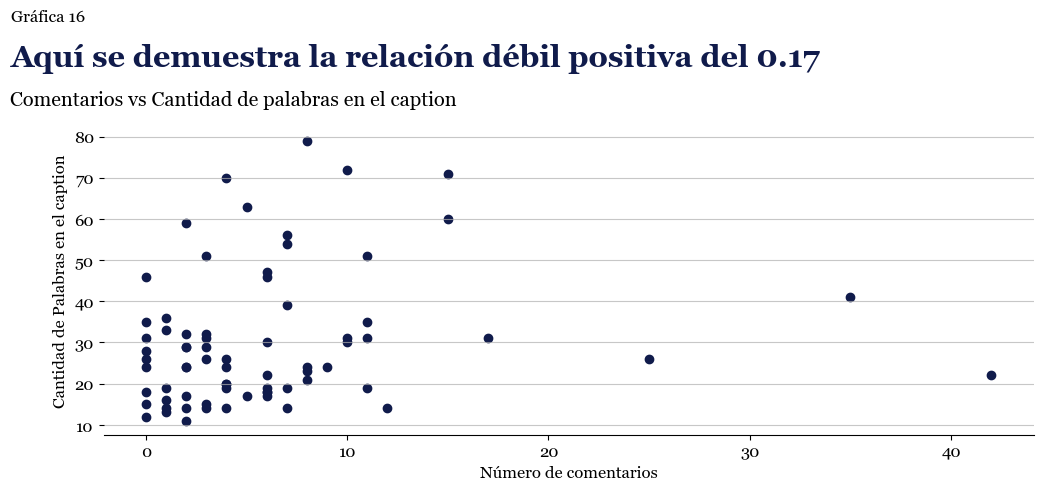

In [562]:
# Configurar la figura y graficar los boxplots
fig, ax = plt.subplots(figsize=[12, 4])
plt.text(x=-6.7, y=108, s='Gráfica 16')
plt.title('Aquí se demuestra la relación débil positiva del 0.17',
          weight='bold', size=22,
          x=-0.1, y=1.17, color=juan_colors[0],
          loc='left')
plt.suptitle('Comentarios vs Cantidad de palabras en el caption',
             ha='left', x=0.047, y=0.97)
plt.scatter(x=norteno['Comentarios'],
            y=norteno['Palabras en Caption'],
            color=juan_colors[0])
plt.ylabel('Cantidad de Palabras en el caption')
plt.xlabel('Número de comentarios')
plt.grid(axis='y', alpha=0.7,
         zorder=1)
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

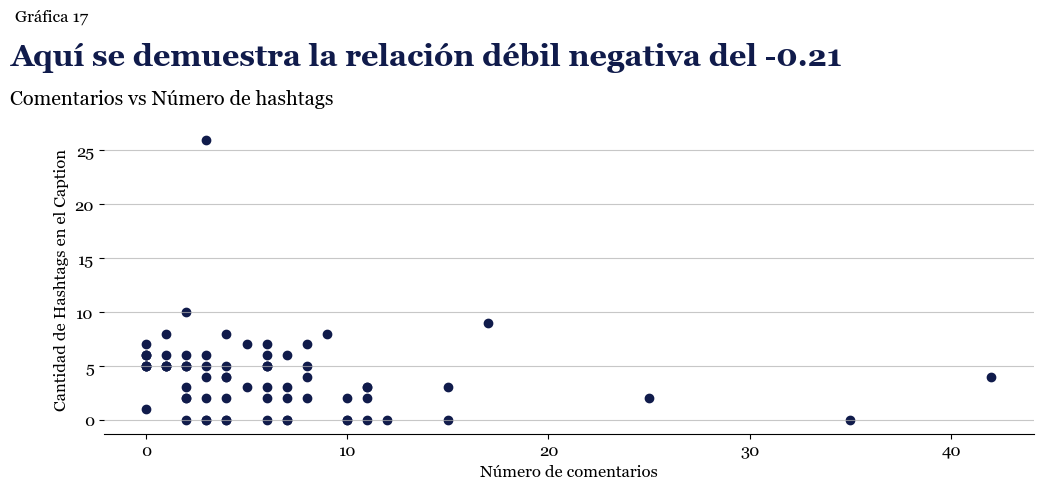

In [563]:
# Configurar la figura y graficar los boxplots
fig, ax = plt.subplots(figsize=[12, 4])
plt.text(x=-6.5, y=37, s='Gráfica 17')
plt.title('Aquí se demuestra la relación débil negativa del -0.21',
          weight='bold', size=22,
          x=-0.1, y=1.17, color=juan_colors[0],
          loc='left')
plt.suptitle('Comentarios vs Número de hashtags',
             ha='left', x=0.047, y=0.97)
plt.scatter(x=norteno['Comentarios'],
            y=norteno['Número de hashtags'],
            color=juan_colors[0])
plt.ylabel('Cantidad de Hashtags en el Caption')
plt.xlabel('Número de comentarios')
plt.grid(axis='y', alpha=0.7,
         zorder=1)
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

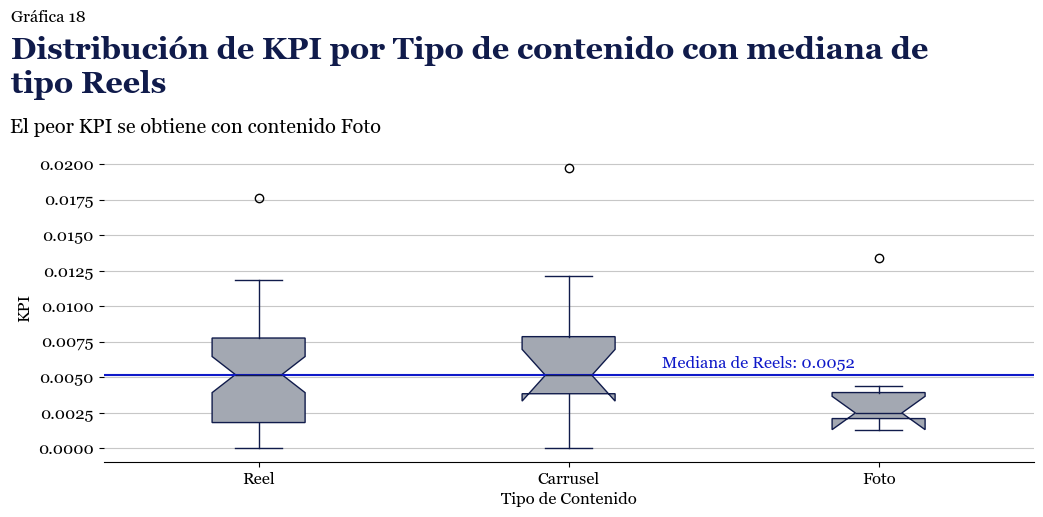

In [564]:
# Listar tipos de contenido y KPIs
tipos_de_contenido = norteno['Tipo'].unique()
KPIs_por_tipo = [norteno[norteno['Tipo'] == tipo]['KPI']
                 for tipo in tipos_de_contenido]

# Configurar la figura y graficar los boxplots
fig, ax = plt.subplots(figsize=[12, 4])
plt.text(x=0.2, y=0.03, s='Gráfica 18')
plt.title(
    'Distribución de KPI por Tipo de contenido con mediana de \ntipo Reels',
    weight='bold', size=22,
    x=-0.1, y=1.17, color=juan_colors[0],
    loc='left')
plt.suptitle('El peor KPI se obtiene con contenido Foto',
             ha='left', x=0.047, y=0.97)
plt.boxplot(KPIs_por_tipo, labels=tipos_de_contenido,
            notch=True, patch_artist=True,
            boxprops=dict(facecolor=juan_colors[2], color=juan_colors[0]),
            whiskerprops=dict(color=juan_colors[0]),
            capprops=dict(color=juan_colors[0]),
            medianprops=dict(color=juan_colors[0]),
            flierprops=dict(color=juan_colors[0]),
            zorder=2)
plt.axhline(y=KPIs_por_tipo[0].median(),
            color=juan_colors[4])
plt.text(x=2.3, y=KPIs_por_tipo[0].median() + 0.0005,
         s=f'Mediana de Reels: {KPIs_por_tipo[0].median():.4f}',
         color=juan_colors[4])
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.7,
         zorder=1)
plt.xlabel('Tipo de Contenido')
plt.ylabel('KPI')
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

La cuenta de Los Hermanos Ariza Show son la mejor cuenta de Instagram en términos de KPI con una estrategia muy fuerte en reels. También es importante mencionar, que las publicaciones con mejores KPIs también resultan tener un promedio de cantidad de palabras en el caption por debajo del promedio general que es 30.28, los mejores lo tienen en 26.67. Además, es claro que los mejores KPIs también se encontraron, en general, cuando las publicaciones llevan menos hashtags que el promedio que es 4.06.

Tenemos relaciones muy débiles entre los comentarios y tanto para el KPI como para la cantidad de palabras en el caption, lo que nos da a entender que la cantidad de comentarios no depende de ninguna de sus variables, ni de los seguidores, ni de la cantidad de likes, ni de las palabras en el caption, ni el número de hashtags en el caption.

En cuanto al tipo de contenido, es comparable el rendimiento entre Reels y Carruseles, sin embargo, las fotos se ubican muy por debajo de éstos otros dos.

In [565]:
# Crear columnas de día de la semana y de hora del día
norteno['Día de la Semana'] = norteno['Fecha y Hora'].dt.dayofweek
norteno['Hora del día'] = norteno['Fecha y Hora'].dt.hour

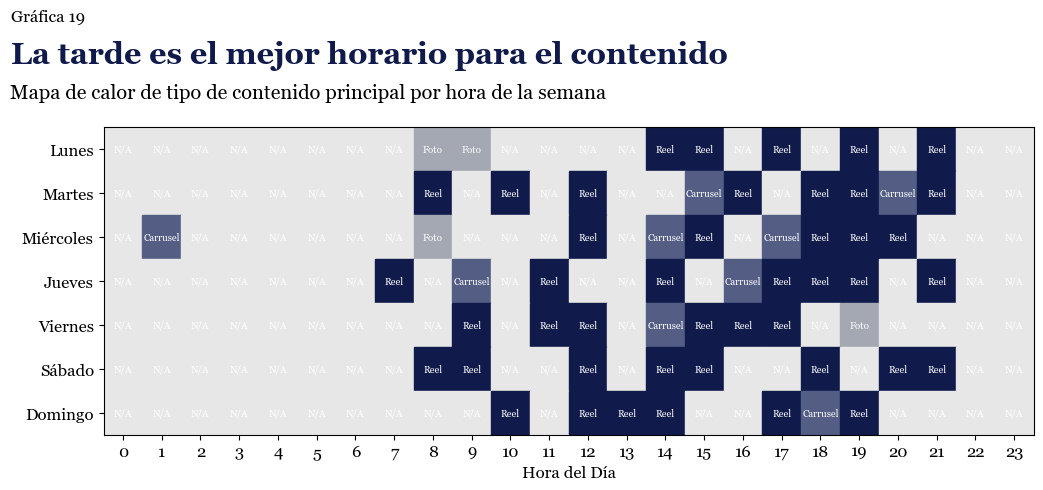

In [566]:
# Hacer matriz del tipo de contenido
heatmap_tipo = norteno.pivot_table(index='Día de la Semana',
                                   columns='Hora del día',
                                   values='Tipo',
                                   aggfunc='max',
                                   fill_value='N/A') \
    .reindex(columns=range(24), fill_value='N/A')

# Graficar el mapa de calor
colors = {'Reel': juan_colors[0],
          'Carrusel': juan_colors[1], 'Foto': juan_colors[2]}
fig, ax = plt.subplots(figsize=(12, 4))
plt.text(x=-2.4, y=-2.4, s='Gráfica 19')
plt.title('La tarde es el mejor horario para el contenido',
          weight='bold', size=22,
          x=-0.1, y=1.18, color=juan_colors[0],
          loc='left')
plt.suptitle(
    'Mapa de calor de tipo de contenido principal por hora de la semana',
    ha='left', x=0.047, y=0.99)
for i in range(heatmap_tipo.shape[0]):
    for j in range(heatmap_tipo.shape[1]):
        tipo = heatmap_tipo.iloc[i, j]
        color = colors.get(tipo, juan_colors[3])
        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=color))
        ax.text(j + 0.5, i + 0.5, str(tipo), ha='center',
                va='center', fontsize=7, color='white')
ax.set_xticks(np.arange(0.5, 24, 1))
ax.set_yticks(np.arange(0.5, len(heatmap_tipo.index), 1))
ax.set_xticklabels(range(24))
ax.set_yticklabels(['Lunes', 'Martes', 'Miércoles',
                    'Jueves', 'Viernes', 'Sábado',
                    'Domingo'])
plt.xlabel('Hora del Día')
ax.set_xlim(0, 24)
ax.set_ylim(0, len(heatmap_tipo.index))
plt.gca().invert_yaxis()
plt.show()

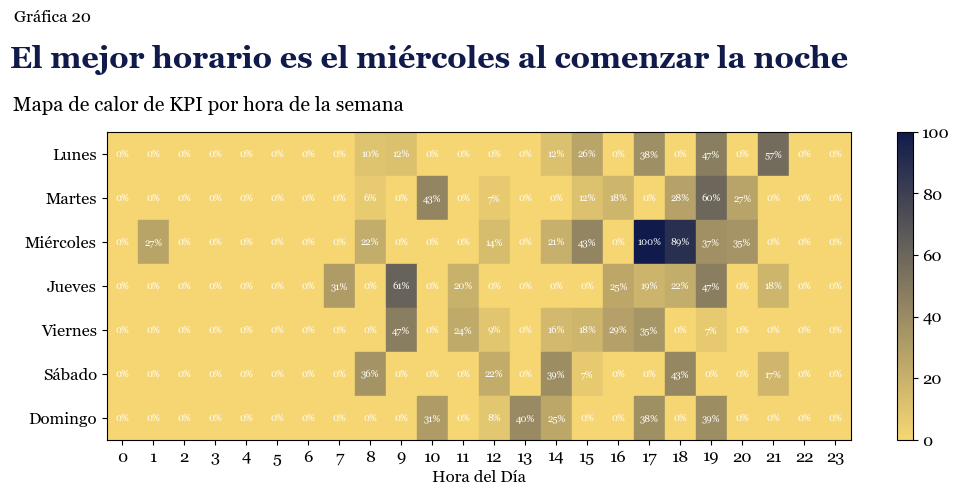

In [594]:
# Hacer matriz del tipo de contenido
heatmap_kpi = norteno.pivot_table(index='Día de la Semana',
                                  columns='Hora del día',
                                  values='KPI',
                                  aggfunc='mean',
                                  fill_value=0) \
    .reindex(columns=range(24), fill_value=0)

# Normalizar los valores de KPI a porcentajes
heatmap_kpi = (heatmap_kpi / heatmap_kpi.max().max()) * 100

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 4))
plt.text(x=-3, y=-2.5, s='Gráfica 20')
plt.title(
    'El mejor horario es el miércoles al comenzar la noche',
    weight='bold', size=22,
    x=-0.13, y=1.18, color=juan_colors[0],
    loc='left')
plt.suptitle('Mapa de calor de KPI por hora de la semana',
             ha='left', x=0.047, y=0.97)
cmap = juan_cmap

for i in range(heatmap_kpi.shape[0]):
    for j in range(heatmap_kpi.shape[1]):
        kpi_value = heatmap_kpi.iloc[i, j]

        norm_value = kpi_value / heatmap_kpi.values.max()
        color = cmap(norm_value)

        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=color))

        ax.text(j + 0.5, i + 0.5, f"{kpi_value:.0f}%",
                ha='center', va='center', fontsize=7, color='white')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=100))
fig.colorbar(sm, ax=ax)
ax.set_xticks(np.arange(0.5, 24, 1))
ax.set_yticks(np.arange(0.5, len(heatmap_kpi.index), 1))
ax.set_xticklabels(range(24), rotation=0)
ax.set_yticklabels(['Lunes', 'Martes', 'Miércoles',
                    'Jueves', 'Viernes', 'Sábado',
                    'Domingo'])
plt.xlabel('Hora del Día')
ax.set_xlim(0, 24)
ax.set_ylim(0, len(heatmap_kpi.index))
plt.gca().invert_yaxis()
plt.show()

A partir de estos dos mapas de calor, podemos concluir los mejores horarios para publicar basados en los KPIs y en el tipo de contenido que se va a publicar. Sin embargo, nos hace falta comparar esta información con las otras cuentas de referencias de los otros géneros para terminar de confirmar nuestras hipótesis.

# <span style="color:#0F19C9">Prueba Estadística de KPI</span>

Debido a que ya generamos las listas de todos los KPIs de las publicaciones correspondientes a cada artista, realizaremos una prueba estadística de comparación de medias, realizaremos la prueba de Análisis de Varianza (ANOVA) ya que se trata de 4 artistas. Fijaremos como nuestro nivel de significancia el valor 0.05, siendo la hipótesis nula: No hay diferencia entre los KPIs de los diferentes artistas.

In [568]:
# Prueba de Levene para igualdad de varianzas
levene_result = stats.levene(likes_por_artista[0],
                             likes_por_artista[1],
                             likes_por_artista[2],
                             likes_por_artista[3])

print(f'El valor P de la Prueba de Levene es: {levene_result.pvalue}')

El valor P de la Prueba de Levene es: 0.0014999632857653814


In [569]:
# Crear una matriz vacía para almacenar los valores p
p_values_matrix = pd.DataFrame(index=artistas, columns=artistas)

# Prueba t por cada par de artistas
for i, artist_i in enumerate(artistas):
    for j, artist_j in enumerate(artistas):
        if i == j:
            p_values_matrix.loc[artist_i, artist_j] = 1.0
        else:
            ttest_result = stats.ttest_ind(likes_por_artista[i],
                                           likes_por_artista[j],
                                           equal_var=False)
            p_values_matrix.loc[artist_i, artist_j] = ttest_result.pvalue

# Mostrar la matriz de valores p
p_values_matrix

,Los Hermanos Ariza Show,Uriel Henao,Grupo Dominio,Los 5 del Norte
Los Hermanos Ariza Show,1.0,0.050029,0.002966,0.000071
Uriel Henao,0.050029,1.0,0.101884,0.00007
Grupo Dominio,0.002966,0.101884,1.0,0.003629
Los 5 del Norte,0.000071,0.00007,0.003629,1.0


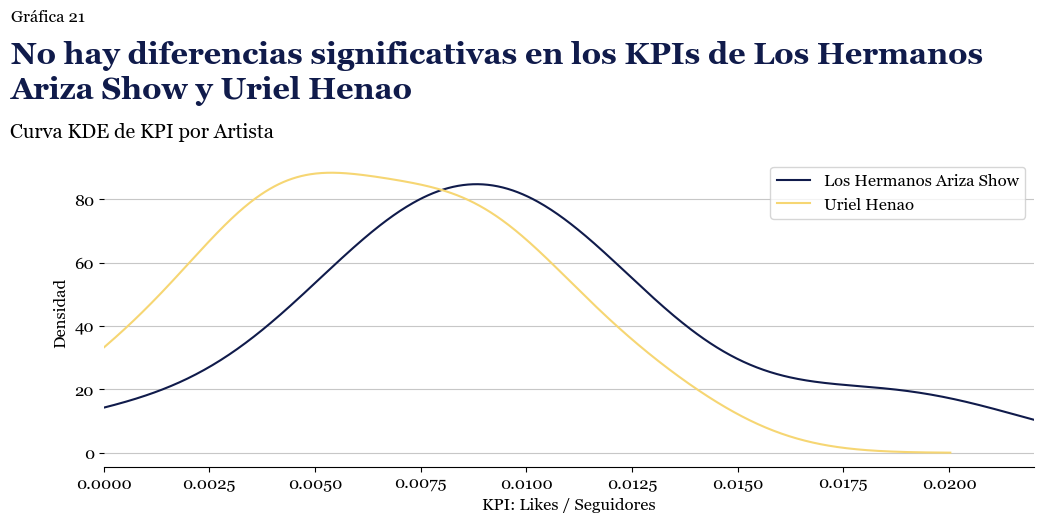

In [570]:
# Graficar los KPIs de nuestros referentes
fig, ax = plt.subplots(figsize=[12, 4])
plt.text(x=-0.0022, y=136, s='Gráfica 21')
plt.title('No hay diferencias significativas en los KPIs de Los Hermanos \nAriza Show y Uriel Henao',
          weight='bold', size=22,
          x=-0.1, y=1.17, color=juan_colors[0],
          loc='left')
plt.suptitle(
    'Curva KDE de KPI por Artista',
    ha='left', x=0.047, y=0.97)
likes_por_artista[0].plot.kde(color=juan_colors[0],
                              label='Los Hermanos Ariza Show')
likes_por_artista[1].plot.kde(color=juan_colors[5],
                              label='Uriel Henao')
plt.grid(axis='y', alpha=0.7,
         zorder=1)
plt.xlabel('KPI: Likes / Seguidores')
plt.ylabel('Densidad')
plt.xlim((0, 0.022))
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.legend()
plt.show()

Debido a que la Prueba de Levene nos arrojó un valor P menor a 0.05 (0.0014), entonces podemos determinar que hay varianzas desiguales. Luego aplicaremos una prueba T de Student de forma par a par que nos generó la matriz de valor p en donde podemos determinar que Los Hermanos Ariza Show tienen KPIs significativamente diferentes a Grupo Dominio y a Los 5 del Norte, pues su valor es menor a 0.05 que fue nuestro nivel de significancia estadística. Entonces, Los Hermanos Ariza Show y Uriel Henao serán nuestros referentes principales en manejo de redes sociales.

# <span style="color:#0F19C9">Comparación Popular y México</span>

Ahora, encontraremos algunas visualizaciones interesantes a partir de nuestras referencias más cercanas: por un lado tenemos 5 artistas de música popular colombiana y por otro lado tenemos 5 artistas de música norteña mexicana. Al final, compararemos los resultados con nuestro análisis anterior para encontrar relaciones y oportunidades.

In [571]:
# Concatenar los dataframes de referencia
referencias = pd.concat([popular, mexico])

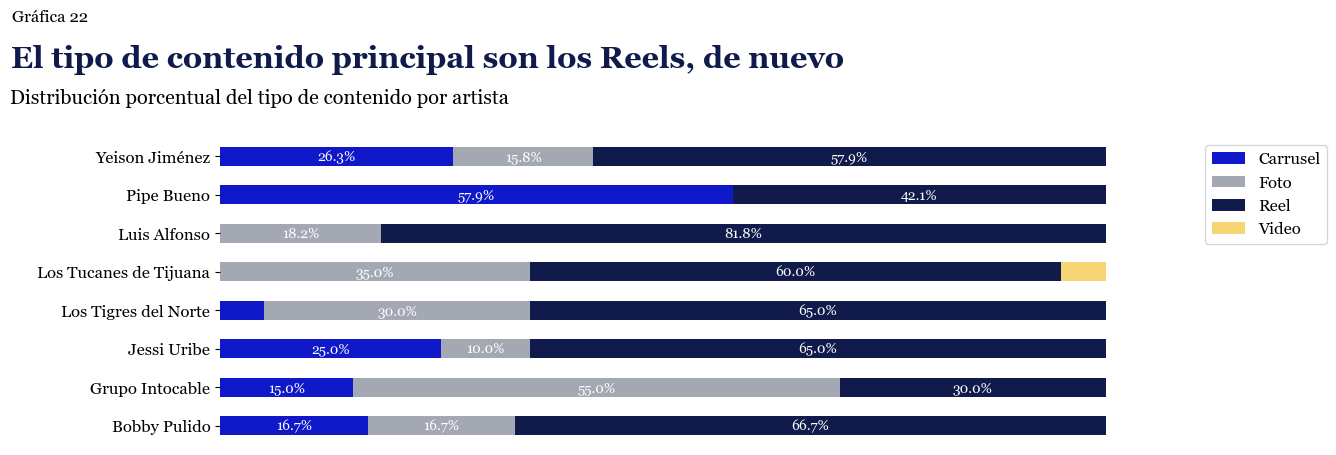

In [572]:
# Contar tipo de contenido por artista
type_of_content = referencias.pivot_table(index='Artista',
                                          columns='Tipo',
                                          values='Fecha y Hora',
                                          aggfunc='count',
                                          fill_value=0)

# Normalizar los datos para que sumen 100 por cada artista
type_of_content = type_of_content.div(
    type_of_content.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 4))
plt.text(x=-23.5, y=10.5,
         s='Gráfica 22')
plt.title('El tipo de contenido principal son los Reels, de nuevo',
          weight='bold', size=22,
          x=-0.225, y=1.2, color=juan_colors[0],
          loc='left')
plt.suptitle('Distribución porcentual del tipo de contenido por artista',
             ha='left', x=-0.05, y=1)
type_of_content.plot(kind='barh', stacked=True,
                     ax=ax, color=[juan_colors[4],
                                   juan_colors[2],
                                   juan_colors[0],
                                   juan_colors[5]])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_ylabel('')
ax.set_xticks([])
for i in range(type_of_content.shape[0]):
    cumulative_sum = 0
    for j, tipo in enumerate(type_of_content.columns):
        value = type_of_content.iloc[i, j]
        if value > 5:
            ax.text(x=cumulative_sum + value / 2, y=i,
                    s=f'{value:.1f}%', ha='center', va='center',
                    color='white', fontsize=10)
        cumulative_sum += value
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.show()

In [573]:
# Porcentaje de tipos de contenido del Popular
referencias['Tipo'].value_counts(normalize=True)

Tipo
Reel        0.567376
Foto        0.234043
Carrusel    0.191489
Video       0.007092
Name: proportion, dtype: float64

In [574]:
# Encontrar el recuento de número de hashtags
referencias['Número de hashtags'].value_counts(normalize=True)

Número de hashtags
0     0.482270
1     0.134752
2     0.099291
3     0.085106
12    0.056738
6     0.049645
4     0.028369
5     0.021277
14    0.021277
25    0.007092
21    0.007092
27    0.007092
Name: proportion, dtype: float64

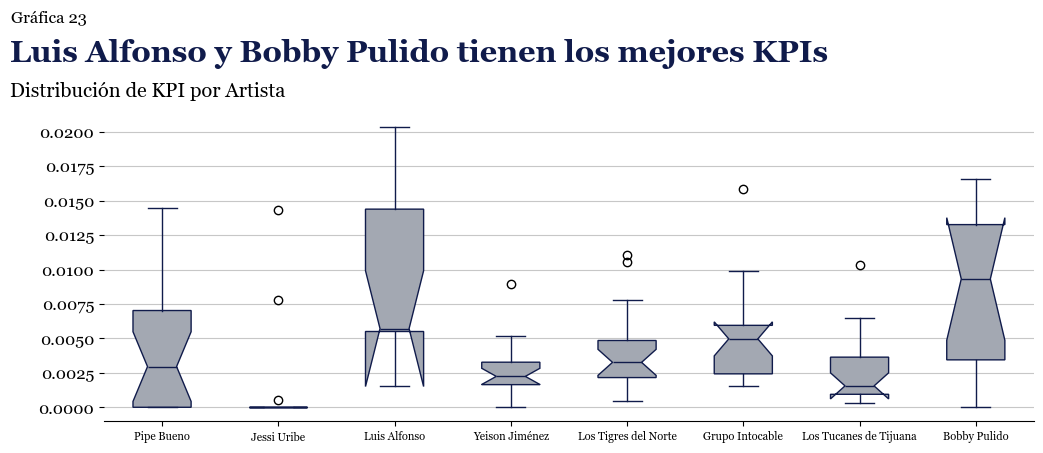

In [575]:
# Agrupar los 'Likes' por 'Artista'
artistas = referencias['Artista'].unique()
likes_por_artista = [referencias[referencias['Artista']
                                 == artista]['KPI'] for artista in artistas]

# Configurar la figura y graficar los boxplots
fig, ax = plt.subplots(figsize=[12, 4])
plt.text(x=-0.302, y=0.028, s='Gráfica 23')
plt.title('Luis Alfonso y Bobby Pulido tienen los mejores KPIs',
          weight='bold', size=22,
          x=-0.101, y=1.14, color=juan_colors[0],
          loc='left')
plt.suptitle(
    'Distribución de KPI por Artista',
    ha='left', x=0.047, y=0.96)
plt.boxplot(likes_por_artista, labels=artistas,
            notch=True, patch_artist=True,
            boxprops=dict(facecolor=juan_colors[2], color=juan_colors[0]),
            whiskerprops=dict(color=juan_colors[0]),
            capprops=dict(color=juan_colors[0]),
            medianprops=dict(color=juan_colors[0]),
            flierprops=dict(color=juan_colors[0]),
            zorder=2)
plt.xticks(rotation=10)
ax.set_xticklabels(artistas, size=8,
                   rotation=0)
plt.grid(axis='y', alpha=0.7,
         zorder=1)
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

In [576]:
# Encontrar las medias de KPI por artista
referencias.groupby('Artista')['KPI'].mean()

Artista
Bobby Pulido              0.008284
Grupo Intocable           0.005238
Jessi Uribe               0.001132
Los Tigres del Norte      0.004173
Los Tucanes de Tijuana    0.002664
Luis Alfonso              0.009453
Pipe Bueno                0.004189
Yeison Jiménez            0.002748
Name: KPI, dtype: float64

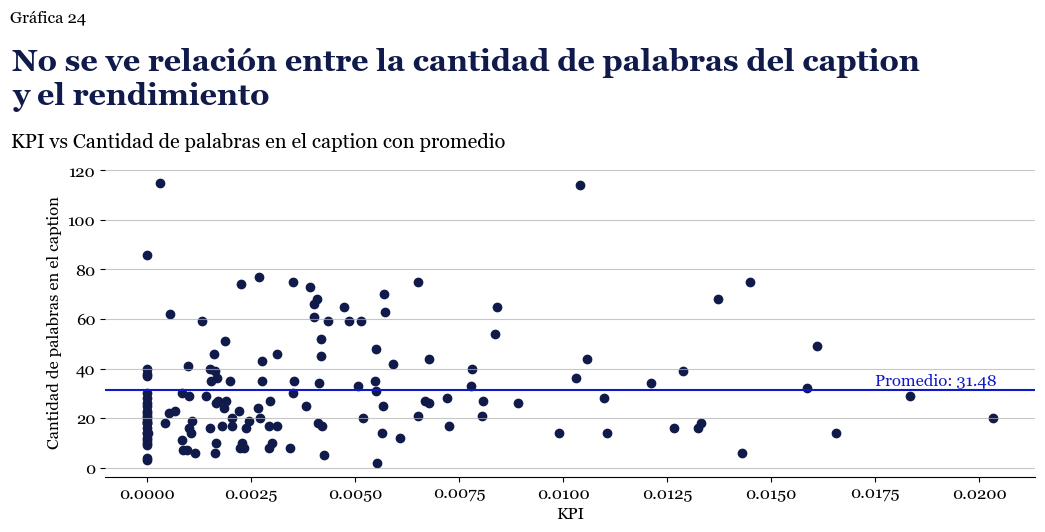

In [577]:
# Mejores KPIS
best_kpi = referencias[referencias['KPI']
                       >= 0.0100]['Palabras en Caption'].mean()

# Configurar la figura y graficar los boxplots
fig, ax = plt.subplots(figsize=[12, 4])
plt.text(x=-0.0033, y=180, s='Gráfica 24', fontsize=12)
plt.title('No se ve relación entre la cantidad de palabras del caption \ny el rendimiento',
          weight='bold', size=22,
          x=-0.1, y=1.18, color=juan_colors[0],
          loc='left')
plt.suptitle(
    'KPI vs Cantidad de palabras en el caption con promedio',
    ha='left', x=0.047, y=0.97)
plt.scatter(x=referencias['KPI'],
            y=referencias['Palabras en Caption'],
            color=juan_colors[0])
plt.axhline(y=referencias['Palabras en Caption'].mean(),
            color=juan_colors[4])
plt.text(x=0.0175,
         y=referencias['Palabras en Caption'].mean() + 2,
         s=f"Promedio: {referencias['Palabras en Caption'].mean():.2f}",
         color=juan_colors[4])
plt.ylabel('Cantidad de palabras en el caption')
plt.xlabel('KPI')
plt.grid(axis='y', alpha=0.7,
         zorder=1)
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

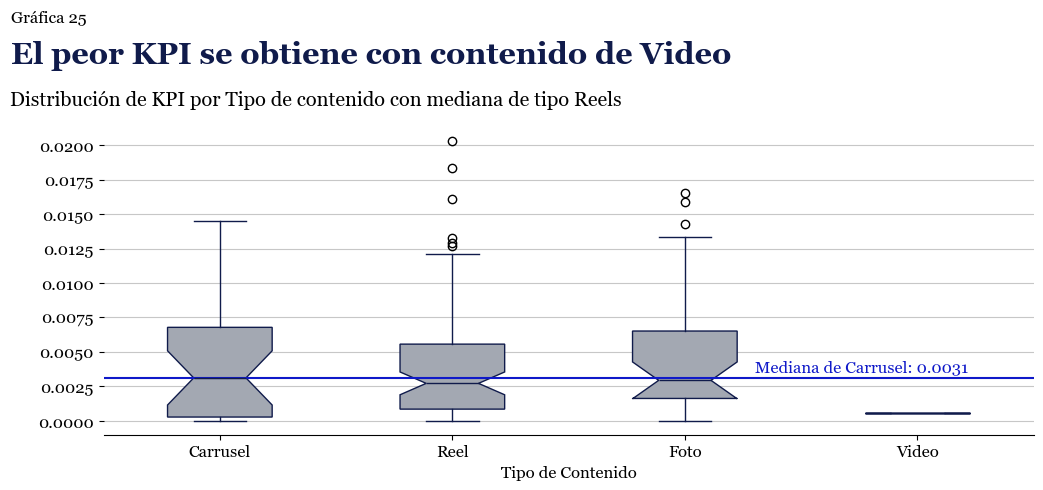

In [578]:
# Listar tipos de contenido y KPIs
tipos_de_contenido = referencias['Tipo'].unique()
KPIs_por_tipo = [referencias[referencias['Tipo'] == tipo]['KPI']
                 for tipo in tipos_de_contenido]

# Configurar la figura y graficar los boxplots
fig, ax = plt.subplots(figsize=[12, 4])
plt.text(x=0.1, y=0.029, s='Gráfica 25', fontsize=12)
plt.title('El peor KPI se obtiene con contenido de Video',
          weight='bold', size=22,
          x=-0.1, y=1.18, color=juan_colors[0],
          loc='left')
plt.suptitle('Distribución de KPI por Tipo de contenido con mediana de tipo Reels',
             ha='left', x=0.047, y=0.97)
plt.boxplot(KPIs_por_tipo, labels=tipos_de_contenido,
            notch=True, patch_artist=True,
            boxprops=dict(facecolor=juan_colors[2], color=juan_colors[0]),
            whiskerprops=dict(color=juan_colors[0]),
            capprops=dict(color=juan_colors[0]),
            medianprops=dict(color=juan_colors[0]),
            flierprops=dict(color=juan_colors[0]),
            zorder=2)
plt.axhline(y=KPIs_por_tipo[0].median(),
            color=juan_colors[4])
plt.text(x=3.3, y=KPIs_por_tipo[0].median() + 0.0005,
         s=f'Mediana de Carrusel: {KPIs_por_tipo[0].median():.4f}',
         color=juan_colors[4])
plt.xticks(rotation=0)
plt.xlabel('Tipo de Contenido')
plt.grid(axis='y', alpha=0.7,
         zorder=1)
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

La estrategia principal de estos referentes se basa en Reels tanto en la música norteña  mexicana (el 54.79% de publicaciones) como en la música popular colombiana (el 59.42%), es decir un 57.04% en general, seguido de Carrusel, que en el caso de la música popular es del 30.43%. Mientras, la estrategia de Los Hermanos Ariza Show es de 92.9% de su contenido en Reels.

También es importante mencionar que, el 48.59% de publicaciones no tienen ningún hashtag, seguido de 1 hashtag que tiene el 13.38% de publicaciones. Mientras en la música norteña colombiana el promedio es de 4 hashtags por publicación.

Los grupos de música norteña mexicana tienden a tener mejor desempeño en likes, comparado con sus seguidores, que los artistas de música popular colombiana. El artista más destacado en Colombia es Luis Alfonso con KPI promedio de 0.009453, mientras el más destacado del género norteño mexicano es Bobby Pulido con 0.008717.

En el caso de nuestras referencias, el Carrusel es el tipo de contenido con mejor KPI en promedio con 0.0031, seguido de muy cerca por las Fotos y los Reels.

In [579]:
# Modificar el tipo de columna
referencias['Fecha y Hora'] = pd.to_datetime(
    referencias['Fecha y Hora'], utc=True)
referencias['Fecha y Hora'] = referencias['Fecha y Hora'].dt.tz_convert(
    'America/Bogota')

# Crear columnas de día de la semana y de hora del día
referencias['Día de la Semana'] = referencias['Fecha y Hora'].dt.dayofweek
referencias['Hora del día'] = referencias['Fecha y Hora'].dt.hour

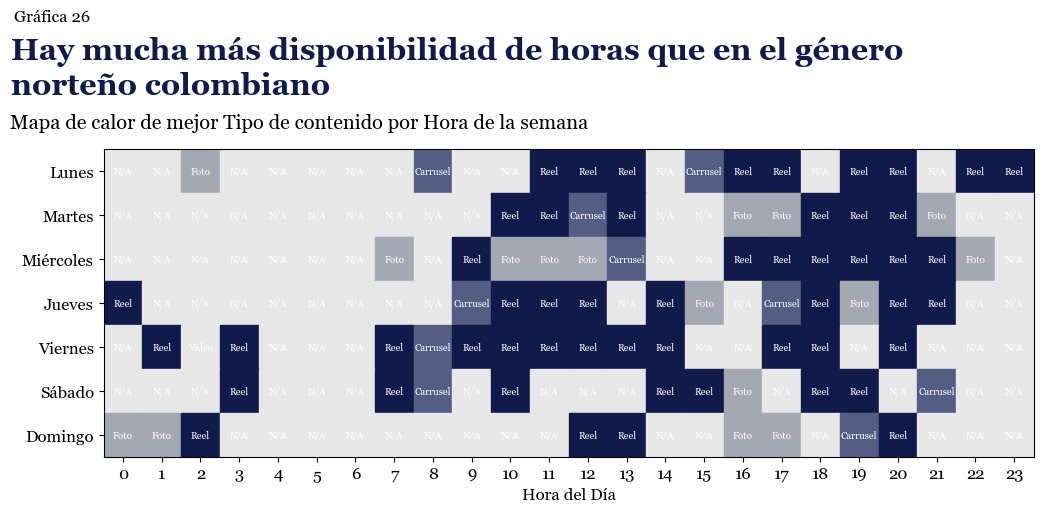

In [580]:
# Hacer matriz del tipo de contenido
heatmap_tipo = referencias.pivot_table(index='Día de la Semana',
                                       columns='Hora del día',
                                       values='Tipo',
                                       aggfunc='max',
                                       fill_value='N/A') \
    .reindex(columns=range(24), fill_value='N/A')

# Graficar el mapa de calor
colors = {'Reel': juan_colors[0],
          'Carrusel': juan_colors[1], 'Foto': juan_colors[2]}
fig, ax = plt.subplots(figsize=(12, 4))
for i in range(heatmap_tipo.shape[0]):
    for j in range(heatmap_tipo.shape[1]):
        tipo = heatmap_tipo.iloc[i, j]
        color = colors.get(tipo, juan_colors[3])
        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=color))
        ax.text(j + 0.5, i + 0.5, str(tipo), ha='center',
                va='center', fontsize=7, color='white')

plt.text(x=-2.3, y=-2.9, s='Gráfica 26', fontsize=12)
plt.title('Hay mucha más disponibilidad de horas que en el género \nnorteño colombiano',
          weight='bold', size=22,
          x=-0.1, y=1.15, color=juan_colors[0],
          loc='left')
plt.suptitle(
    'Mapa de calor de mejor Tipo de contenido por Hora de la semana',
    ha='left', x=0.047, y=0.97)
ax.set_xticks(np.arange(0.5, 24, 1))
ax.set_yticks(np.arange(0.5, len(heatmap_tipo.index), 1))
ax.set_xticklabels(range(24))
ax.set_yticklabels(['Lunes', 'Martes', 'Miércoles',
                    'Jueves', 'Viernes', 'Sábado',
                    'Domingo'])
plt.xlabel('Hora del Día')
ax.set_xlim(0, 24)
ax.set_ylim(0, len(heatmap_tipo.index))
plt.gca().invert_yaxis()
plt.show()

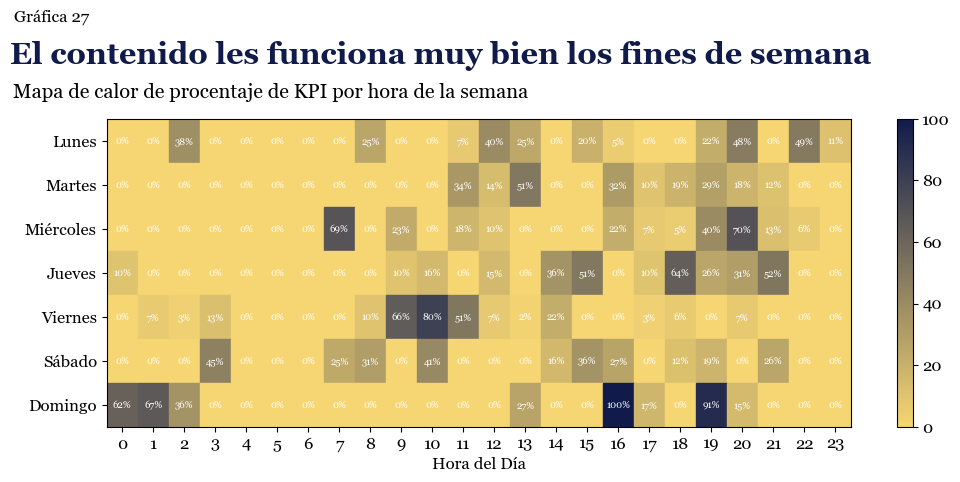

In [593]:
# Hacer matriz del tipo de contenido
heatmap_kpi = referencias.pivot_table(index='Día de la Semana',
                                      columns='Hora del día',
                                      values='KPI',
                                      aggfunc='mean',
                                      fill_value=0) \
    .reindex(columns=range(24), fill_value=0)

# Normalizar los valores de KPI a porcentajes
heatmap_kpi = (heatmap_kpi / heatmap_kpi.max().max()) * 100

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 4))
plt.text(x=-3, y=-2.2, s='Gráfica 27', fontsize=12)
plt.title(
    'El contenido les funciona muy bien los fines de semana',
    weight='bold', size=22,
    x=-0.13, y=1.15, color=juan_colors[0],
    loc='left')
plt.suptitle('Mapa de calor de procentaje de KPI por hora de la semana',
             ha='left', x=0.047, y=0.97)
cmap = juan_cmap
for i in range(heatmap_kpi.shape[0]):  # Filas (Días de la Semana)
    for j in range(heatmap_kpi.shape[1]):  # Columnas (Horas del Día)
        kpi_value = heatmap_kpi.iloc[i, j]
        norm_value = kpi_value / heatmap_kpi.values.max()
        color = cmap(norm_value)
        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=color))
        ax.text(j + 0.5, i + 0.5, f"{kpi_value:.0f}%",
                ha='center', va='center', fontsize=7, color='white')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=100))
fig.colorbar(sm, ax=ax)
ax.set_xticks(np.arange(0.5, 24, 1))
ax.set_yticks(np.arange(0.5, len(heatmap_kpi.index), 1))
ax.set_xticklabels(range(24), rotation=0)
ax.set_yticklabels(['Lunes', 'Martes', 'Miércoles',
                    'Jueves', 'Viernes', 'Sábado',
                    'Domingo'])
plt.xlabel('Hora del Día')
ax.set_xlim(0, 24)
ax.set_ylim(0, len(heatmap_kpi.index))
plt.gca().invert_yaxis()
plt.show()

Es importante mencionar que las publicaciones son ligeramente más tarde que con nuestros artistas. Claramente en la madrugada no hay movimiento en las redes de nuestras referencias al igual que en nuestros artistas.

Respecto a las mejores horas de la semana, se encuentran los fines de semana, entre la tarde y la noche. Este resultado difiere mucho de nuestros artistas de música norteña colombiana donde hay gran oportunidad entre semana entre las 16 y las 20 horas.

# <span style="color:#0F19C9">Prueba Estadística de Referentes</span>

Vamos a comenzar encontrando el artista del género popular colombiano con mejor promedio de KPIs y lo compararemos con los otros para determinar nuestros mejores casos de referencia. Lo mismo haremos con los artistas del género norteño mexicano.

In [582]:
# Separar los KPIs por artista
kpis_por_artista = {}
for artist in referencias['Artista'].unique():
    kpis_por_artista[artist] = referencias[referencias['Artista']
                                           == artist]['KPI'].values

# Encontrar los mejores promedios
for key, value in kpis_por_artista.items():
    print(f'El promedio de KPIs de {key} es {value.mean():.4f}')

El promedio de KPIs de Pipe Bueno es 0.0042
El promedio de KPIs de Jessi Uribe es 0.0011
El promedio de KPIs de Luis Alfonso es 0.0095
El promedio de KPIs de Yeison Jiménez es 0.0027
El promedio de KPIs de Los Tigres del Norte es 0.0042
El promedio de KPIs de Grupo Intocable es 0.0052
El promedio de KPIs de Los Tucanes de Tijuana es 0.0027
El promedio de KPIs de Bobby Pulido es 0.0083


In [583]:
# Prueba de Levene para igualdad de varianzas en popular
levene_result = stats.levene(kpis_por_artista['Pipe Bueno'],
                             kpis_por_artista['Jessi Uribe'],
                             kpis_por_artista['Luis Alfonso'],
                             kpis_por_artista['Yeison Jiménez'],)

print(f'El valor P de la Prueba de Levene es: {levene_result.pvalue}')

El valor P de la Prueba de Levene es: 0.002704252018941819


In [584]:
# Prueba de Levene para igualdad de varianzas en popular
levene_result = stats.levene(kpis_por_artista['Los Tigres del Norte'],
                             kpis_por_artista['Grupo Intocable'],
                             kpis_por_artista['Los Tucanes de Tijuana'],
                             kpis_por_artista['Bobby Pulido'],)

print(f'El valor P de la Prueba de Levene es: {levene_result.pvalue}')

El valor P de la Prueba de Levene es: 0.0003272562954743575


In [585]:
# Hacer pruebas t de student
ttest_result = stats.ttest_ind(kpis_por_artista['Luis Alfonso'],
                               kpis_por_artista['Pipe Bueno'],
                               equal_var=False)
print(
    f'El valor p de la prueba entre Luis Alfonso y Pipe Bueno es de {ttest_result.pvalue:.4f}')
ttest_result = stats.ttest_ind(kpis_por_artista['Luis Alfonso'],
                               kpis_por_artista['Jessi Uribe'],
                               equal_var=False)
print(
    f'El valor p de la prueba entre Luis Alfonso y Jessi Uribe es de {ttest_result.pvalue:.4f}')
ttest_result = stats.ttest_ind(kpis_por_artista['Luis Alfonso'],
                               kpis_por_artista['Yeison Jiménez'],
                               equal_var=False)


print(
    f'El valor p de la prueba entre Luis Alfonso y Yeison Jiménez es de {ttest_result.pvalue:.4f}')

El valor p de la prueba entre Luis Alfonso y Pipe Bueno es de 0.0314
El valor p de la prueba entre Luis Alfonso y Jessi Uribe es de 0.0018
El valor p de la prueba entre Luis Alfonso y Yeison Jiménez es de 0.0072


In [586]:
# Hacer pruebas t de student
ttest_result = stats.ttest_ind(kpis_por_artista['Bobby Pulido'],
                               kpis_por_artista['Los Tigres del Norte'],
                               equal_var=False)
print(
    f'El valor p de la prueba entre Bobby Pulido y Los Tigres del Norte es de {ttest_result.pvalue:.4f}')
ttest_result = stats.ttest_ind(kpis_por_artista['Bobby Pulido'],
                               kpis_por_artista['Grupo Intocable'],
                               equal_var=False)
print(
    f'El valor p de la prueba entre Bobby Pulido y Grupo Intocable es de {ttest_result.pvalue:.4f}')
ttest_result = stats.ttest_ind(kpis_por_artista['Bobby Pulido'],
                               kpis_por_artista['Los Tucanes de Tijuana'],
                               equal_var=False)
print(
    f'El valor p de la prueba entre Bobby Pulido y Los Tucanes de Tijuana es de {ttest_result.pvalue:.4f}')

El valor p de la prueba entre Bobby Pulido y Los Tigres del Norte es de 0.0410
El valor p de la prueba entre Bobby Pulido y Grupo Intocable es de 0.1234
El valor p de la prueba entre Bobby Pulido y Los Tucanes de Tijuana es de 0.0078


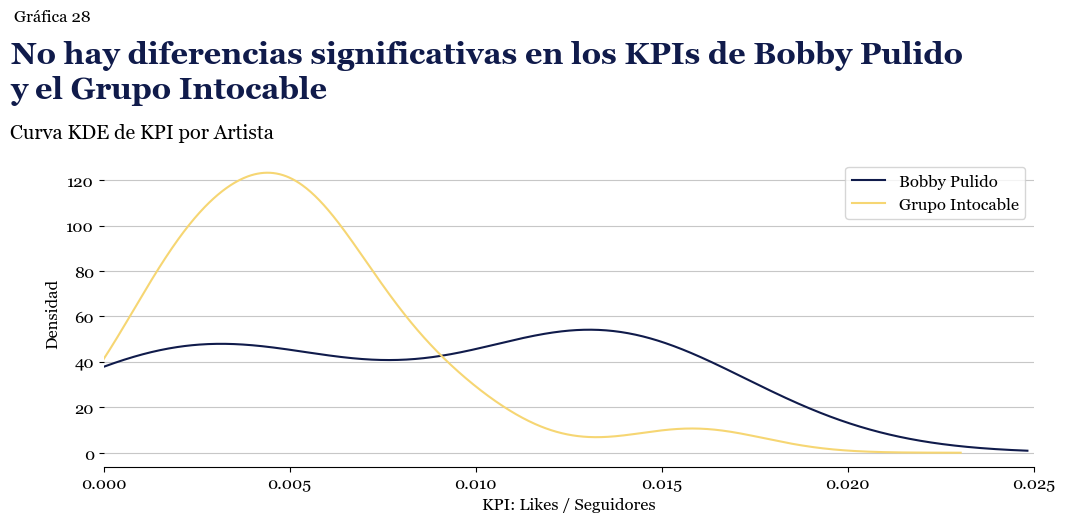

In [587]:

# Graficar los KPIs de nuestros referentes
fig, ax = plt.subplots(figsize=[12, 4])
plt.text(x=-0.0024, y=190, s='Gráfica 28')
plt.title('No hay diferencias significativas en los KPIs de Bobby Pulido \ny el Grupo Intocable',
          weight='bold', size=22,
          x=-0.1, y=1.17, color=juan_colors[0],
          loc='left')
plt.suptitle(
    'Curva KDE de KPI por Artista',
    ha='left', x=0.047, y=0.97)
pd.Series(kpis_por_artista['Bobby Pulido']) \
    .plot.kde(color=juan_colors[0],
              label='Bobby Pulido')
pd.Series(kpis_por_artista['Grupo Intocable']) \
    .plot.kde(color=juan_colors[5],
              label='Grupo Intocable')
plt.grid(axis='y', alpha=0.7,
         zorder=1)
plt.xlabel('KPI: Likes / Seguidores')
plt.xlim((0, 0.025))
plt.ylabel('Densidad')
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.legend()
plt.show()

Primero corroboramos la información visual que nos dió la gráfica 23 en la que Luis Alfonso y Bobby Pulido son los artistas con mejores KPIs actualmente en sus géneros con un promedio de 0.0095 y 0.0083 respectivamente.

La prueba de Levene nos dió un valor menor a 0.05 que es nuestro nivel de significancia estadística en ambas pruebas, entonces tenemos varianzas desiguales, por lo que aplicamos pruebas t de Student de par a par con varianzas diferentes.

La conclusión es que hay diferencias significativas entre los KPIs de Luis Alfonso y los de los otros artistas del género popular colombiano, por lo que Luis Alfonso sería el principal exponente. Mientras que en el género norteño mexicano, no se encontró una diferencia significativa entre Bobby Pulido y el Grupo Intocable con un valor p en la prueba t de Student de 0.12, claramente mayor que 0.05, por lo que el Grupo Intocable se convierte en un referentes interesante para analizar.

# <span style="color:#0F19C9">Publicaciones Virales</span>

Finalmente, usaremos nuestro último conjunto de datos que surgió a partir de tener cantidades atípicas de likes, respecto a los números de seguidores del artista.

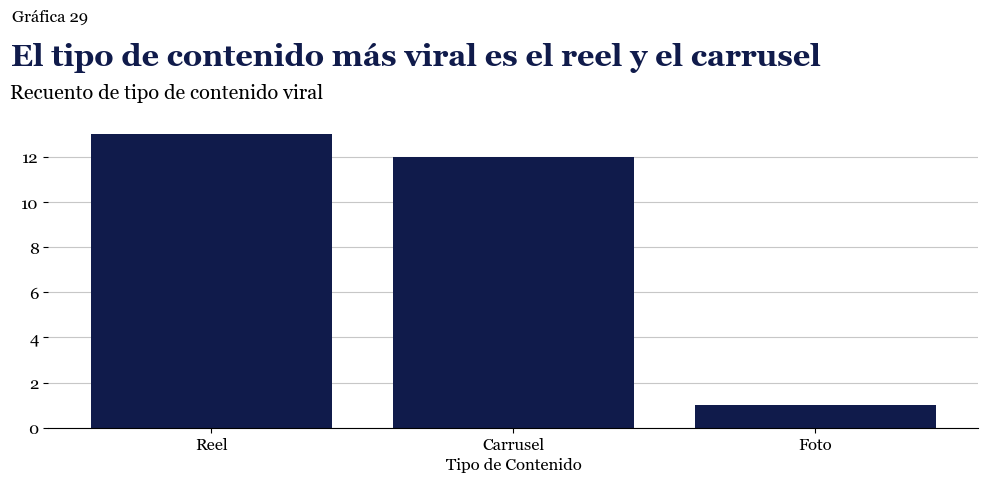

In [588]:
# Encontrar tipos de contenido virales
top_type_viral = viral['Tipo'] \
    .value_counts() \
    .sort_values(ascending=False)

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 4))
plt.text(x=-0.66, y=18,
         s='Gráfica 29')
plt.title('El tipo de contenido más viral es el reel y el carrusel',
          weight='bold', size=22,
          x=-0.04, y=1.15, color=juan_colors[0],
          loc='left')
plt.suptitle('Recuento de tipo de contenido viral',
             ha='left', x=0.093, y=0.97)
plt.bar(x=top_type_viral.index,
        height=top_type_viral,
        color=juan_colors[0],
        zorder=2)
plt.xlabel('Tipo de Contenido')
plt.grid(axis='y', alpha=0.7,
         zorder=1)
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

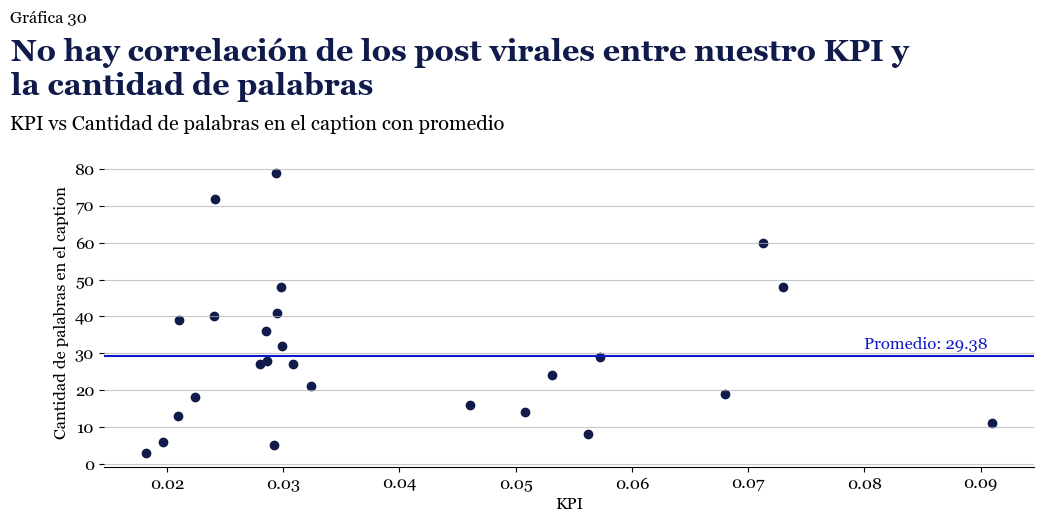

In [589]:
# Configurar la figura y graficar los boxplots
fig, ax = plt.subplots(figsize=[12, 4])
plt.text(x=0.0065, y=120, s='Gráfica 30', fontsize=12)
plt.title('No hay correlación de los post virales entre nuestro KPI y \nla cantidad de palabras',
          weight='bold', size=22,
          x=-0.1, y=1.18, color=juan_colors[0],
          loc='left')
plt.suptitle(
    'KPI vs Cantidad de palabras en el caption con promedio',
    ha='left', x=0.047, y=0.99)
plt.scatter(x=viral['KPI'],
            y=viral['Palabras en Caption'],
            color=juan_colors[0])
plt.axhline(y=viral['Palabras en Caption'].mean(),
            color=juan_colors[4])
plt.text(x=0.08,
         y=viral['Palabras en Caption'].mean() + 2,
         s=f"Promedio: {viral['Palabras en Caption'].mean():.2f}",
         color=juan_colors[4])
plt.ylabel('Cantidad de palabras en el caption')
plt.xlabel('KPI')
plt.grid(axis='y', alpha=0.7,
         zorder=1)
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

In [590]:
# Modificar el tipo de columna
viral['Fecha y Hora'] = pd.to_datetime(viral['Fecha y Hora'], utc=True)
viral['Fecha y Hora'] = viral['Fecha y Hora'].dt.tz_convert('America/Bogota')

# Crear columnas de día de la semana y de hora del día
viral['Día de la Semana'] = viral['Fecha y Hora'].dt.dayofweek
viral['Hora del día'] = viral['Fecha y Hora'].dt.hour

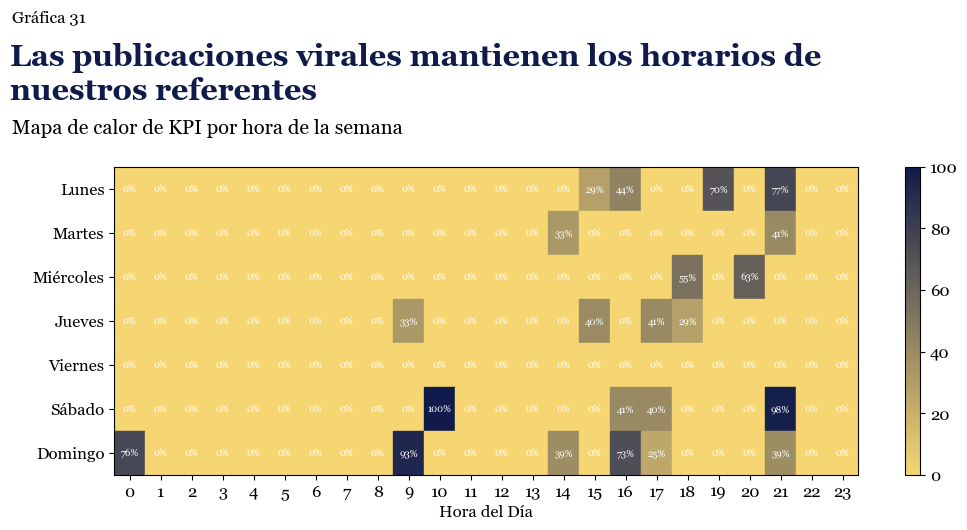

In [592]:
# Hacer matriz del tipo de contenido
heatmap_kpi = viral.pivot_table(index='Día de la Semana',
                                columns='Hora del día',
                                values='KPI',
                                aggfunc='mean',
                                fill_value=0) \
    .reindex(columns=range(24),
             fill_value=0,
             index=range(7))

# Normalizar los valores de KPI a porcentajes
heatmap_kpi = (heatmap_kpi / heatmap_kpi.max().max()) * 100

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 4))
plt.text(x=-3.3, y=-3.3, s='Gráfica 31', fontsize=12)
plt.title(
    'Las publicaciones virales mantienen los horarios de \nnuestros referentes',
    weight='bold', size=22,
    x=-0.14, y=1.19, color=juan_colors[0],
    loc='left')
plt.suptitle('Mapa de calor de KPI por hora de la semana',
             ha='left', x=0.04, y=1)
cmap = juan_cmap
for i in range(heatmap_kpi.shape[0]):  # Filas (Días de la Semana)
    for j in range(heatmap_kpi.shape[1]):  # Columnas (Horas del Día)
        kpi_value = heatmap_kpi.iloc[i, j]
        norm_value = kpi_value / heatmap_kpi.values.max()  # Normalización
        color = cmap(norm_value)  # Obtener el color del colormap
        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=color))
        ax.text(j + 0.5, i + 0.5, f"{kpi_value:.0f}%",
                ha='center', va='center', fontsize=7, color='white')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=100))
fig.colorbar(sm, ax=ax)
ax.set_xticks(np.arange(0.5, 24, 1))
ax.set_yticks(np.arange(0.5, len(heatmap_kpi.index), 1))
ax.set_xticklabels(range(24), rotation=0)
ax.set_yticklabels(['Lunes', 'Martes', 'Miércoles',
                    'Jueves', 'Viernes', 'Sábado',
                    'Domingo'])
plt.xlabel('Hora del Día')
ax.set_xlim(0, 24)
ax.set_ylim(0, len(heatmap_kpi.index))
plt.gca().invert_yaxis()
plt.show()

El tipo de contenido que más se viraliza son los Reels y los carruseles, tal como nos lo apuntaba nuestro análisis original. Mientras que el promedio de palabras del caption de las publicaciones virales es de 29.38, sólo un poco menor a nuestro análisis principal que es de 30.28 palabras por publicación.

Los contenido virales se han publicado en la tarde-noche entre semana, mientras los fines de semana, han sido publicados también entre las 9 y 10 de la mañana.

# <span style="color:#0F19C9">Conclusiones</span>

- Analizamos principalmente publicaciones del último mes de artistas del género norteño colombiano, soportado por referencias de la música popular colombiana y la música norteña mexicana. Y al final, se hizo un breve análisis sobre las publicaciones virales de estos artistas.
- Hay un correlación de 0.5483 entre el número de seguidores y el número de likes, razón por la que se creó y se evaluó nuestro KPI = likes / seguidores.
- El promedio de nuestro KPI, el número de likes dividido entre el número de seguidores, del género norteño colombiano es de 0.004974. Y la mediana de likes por publicación es de 195.5.
- El artista con mejor desempeño en nuestro KPI, en general, es Los Hermanos Ariza Show, seguido de Uriel Henao, cuyos KPIs no tienen gran diferencia, se deberían tener en cuenta ambos.
- La mediana de comentarios por publicación es de 4. Es decir, los seguidores del género no acostumbran a comentar.
- El intervalo intercuartílico de la cantidad de palabras por publicación es desde 19 a 35 palabras incluyendo los hashtags, con una media de 30.5. Este valor se disminuye en poco (26.67) en las publicaciones con más alto KPI. Mientras la mediana de hashtags es de 4 hashtags por publicación.
- El principal tipo de contenido en nuestro género son los Reels, seguidos de carruseles. A la vez, estos son los tipos de contenido más virales. Las fotos son el tipo de contenido que peor se desempeña.
- El mejor horario para publicar son los días martes, jueves, viernes, sábados y domingos de 8 a 10 am. Mientras que los lunes, martes, miércoles, jueves, sábados y domingos en la tarde, el mejor horario es de 5 a 7 pm. El horario más importante del género es el miércoles de 5 a 6 pm.
- Nuestros artistas de referencia basan su estrategia en Reels en un 57.04% de sus publicaciones. El 48.59% de sus publicaciones no tienen hashtags. Los artistas de música norteña mexicana tienen mejor desempeño que los artistas de música popular colombiana. El artista más destacado de música norteña mexicana es Bobby Pulido con un KPI promedio de 0.008284 y Grupo Intocable con uno de 0.005238, mientras el artista más destacado de música popular colombiana es Luis Alfono con un KPI promedio de 0.009453. Sus publicaciones son ligeramente más tarde que las del género norteño colombiano con un gran desempeño los fines de semana, principalmente el domingo entre las 4 y las 8 pm.
- El tipo de contenido que más se viraliza son los Reels y los Carruseles y sigue la misma programación que el contenido de nuestros referentes. El promedio de palabras del caption es ligeramente más bajo que los de nuestro análisis (30.28 palabras). Estos contenidos virales han sido publicados principalmente en la tarde-noche, o en la mañana, de 9 a 10 am, los fines de semana.